<a href="https://colab.research.google.com/github/lovedatascience1/AcademyPublic/blob/main/Boats_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Boat price
#### Here is the script to get the data directly from kaggle through colab

!pip install -q kaggle
from google.colab import files
files.upload()
#create a kaggle folder
!mkdir ~/.kaggle

# Go on kaggle > Account > Create New API token
# Save the json file in your laptop in a dedicated folder

# copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle
#permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

# Datasets available here: 
# https://www.kaggle.com/datasets/artemkorottchenko/large-boatyacht-pricing-dataset
!kaggle datasets download -d artemkorottchenko/large-boatyacht-pricing-dataset
!unzip large-boatyacht-pricing-dataset.zip

#### End of the script to get the data directly from kaggle through colab
# Remember that when you run it, you have to click on the button Choose Files and 
# then select the kaggle.json file from your computer

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
large-boatyacht-pricing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  large-boatyacht-pricing-dataset.zip
replace boat_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: boat_dataset.csv        


# Import Data

Import dataset from kaggle


In [3]:
import pandas as pd
import io
import numpy as np
pd.options.display.max_columns = 100
pd.options.display.max_rows = 50
df = pd.read_csv('/content/boat_dataset.csv', encoding='latin1')

df = pd.read_csv(io.StringIO(open('/content/boat_dataset.csv', 'rb').read().decode('utf-8', errors='ignore')), sep=",")
df.head()

Price     Category            Boat Type          Manufacturer  \
0   CHF 3.337,-  Power Boats          Motor Yacht  Rigiflex power boats   
1   EUR 3.490,-  Power Boats  Center console boat     Terhi power boats   
2   CHF 3.770,-  Power Boats           Sport Boat    Marine power boats   
3  DKK 25.900,-  Power Boats           Sport Boat    Pioner power boats   
4  SEK 35.000,-  Power Boats              Classic                   NaN   

                        Model Boat name                 Type  Year Built  \
0                     CAP 400       NaN  new boat from stock      2017.0   
1                       400 C       NaN  new boat from stock      2020.0   
2             370 S - Aluboot       NaN  new boat from stock         NaN   
3  10 Classic Special Edition       NaN  new boat from stock      2020.0   
4          Gullholmensnipa 21       NaN            Used boat      1974.0   

  Condition  Length   Width   Depth Displacement CE Design Category  \
0    as new  4.00 m  1.90 m     NaN          NaN                NaN   
1       new  4.00 m  1.50 m     NaN       150 kg                NaN   
2       NaN  3.69 m  1.42 m  0.25 m          NaN                NaN   
3       NaN  3.00 m  1.00 m     NaN       110 kg                NaN   
4      good  6.30 m  2.50 m  0.75 m     2'000 kg                NaN   

   Cert Number of People  Number of Cabins  Number of beds Hull Color  \
0                    7.0               NaN             NaN      white   
1                    NaN               NaN             NaN        NaN   
2                    4.0               NaN             NaN        NaN   
3                    NaN               NaN             NaN        NaN   
4                    NaN               NaN             2.0        NaN   

   Number of Toilets  Number of Bathrooms  Number of Showers       Material  \
0                NaN                  NaN                NaN            NaN   
1                NaN                  NaN                NaN  Thermoplastic   
2                NaN                  NaN                NaN      Aluminium   
3                NaN                  NaN                NaN            NaN   
4                NaN                  NaN                NaN            NaN   

  Fresh Water Cap Holding Tank          Propulsion  \
0             NaN          NaN                 NaN   
1             NaN          NaN                 NaN   
2             NaN          NaN                 NaN   
3             NaN          NaN                 NaN   
4             NaN          NaN  Inboard with Shaft   

                                Engine Engine Performance Fuel Capacity  \
0                                  NaN                NaN           NaN   
1                                  NaN                NaN           NaN   
2   (Permission for Lake of Constance)                NaN           NaN   
3                                  NaN                NaN           NaN   
4                   VolvoPenta MD 2002  1 x 18 HP / 13 kW          50 l   

  Fuel Type Engine Hours Max Speed Cruising Speed  \
0       NaN          NaN       NaN            NaN   
1       NaN          NaN       NaN            NaN   
2       NaN          NaN       NaN            NaN   
3       NaN          NaN       NaN            NaN   
4       NaN        500 h       NaN            NaN   

                                  Location Advertisement Date  \
0      Switzerland » Lake Geneva » Vésenaz                NaN   
1                   Germany » Bönningstedt                NaN   
2  Switzerland » Lake of Zurich » Stäfa ZH                NaN   
3                      Denmark » Svendborg                NaN   
4                Nordsee » Västra Frölunda         04.07.2020   

  Number of views last 7 days  \
0                         226   
1                          75   
2                         124   
3                          64   
4                         131   

                                            Comments  \
0                   

# EDA (Exploratory Data Analysis)


Explore dataframe: columns, shape, description

In [4]:
# check dimensions of the dataframe
df.shape # first elements are rows, second the columns : 10344 rows and 38 columns

(10344, 38)

In [5]:
# check the variable names / columns
df.columns

Index(['Price', 'Category', 'Boat Type', 'Manufacturer', 'Model', 'Boat name',
       'Type', 'Year Built', 'Condition', 'Length', 'Width', 'Depth',
       'Displacement', 'CE Design Category', 'Cert Number of People',
       'Number of Cabins', 'Number of beds', 'Hull Color', 'Number of Toilets',
       'Number of Bathrooms', 'Number of Showers', 'Material',
       'Fresh Water Cap', 'Holding Tank', 'Propulsion', 'Engine',
       'Engine Performance', 'Fuel Capacity', 'Fuel Type', 'Engine Hours',
       'Max Speed', 'Cruising Speed', 'Location', 'Advertisement Date',
       'Number of views last 7 days', 'Comments', 'Additional Comments',
       'Equipment'],
      dtype='object')

In [6]:
df.info() # check datatypes of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10344 entries, 0 to 10343
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        10344 non-null  object 
 1   Category                     10344 non-null  object 
 2   Boat Type                    10344 non-null  object 
 3   Manufacturer                 8954 non-null   object 
 4   Model                        10341 non-null  object 
 5   Boat name                    1313 non-null   object 
 6   Type                         10339 non-null  object 
 7   Year Built                   9777 non-null   float64
 8   Condition                    3375 non-null   object 
 9   Length                       10334 non-null  object 
 10  Width                        10281 non-null  object 
 11  Depth                        7234 non-null   object 
 12  Displacement                 5051 non-null   object 
 13  CE Design Catego

In [7]:
df.describe() # check the statisctics (mean, median, standrad deviation, quantiles..) of numerical variables

Year Built  Cert Number of People  Number of Cabins  Number of beds  \
count  9777.000000            3597.000000       6475.000000     6407.000000   
mean   2004.830725               9.355296          2.149035        4.345716   
std      16.309045              24.037107          2.145005        3.974223   
min    1885.000000               1.000000         -1.000000      -23.000000   
25%    1999.000000               7.000000          1.000000        2.000000   
50%    2008.000000               8.000000          2.000000        4.000000   
75%    2017.000000              10.000000          3.000000        6.000000   
max    2021.000000            1200.000000         96.000000      266.000000   

       Number of Toilets  Number of Bathrooms  Number of Showers  
count        2156.000000           463.000000        1941.000000  
mean            1.763915             1.289417           1.550747  
std             2.076365             0.653360           0.930096  
min             1.000000             1.000000           1.000000  
25%             1.000000             1.000000           1.000000  
50%             1.000000             1.000000           1.000000  
75%             2.000000             1.000000           2.000000  
max            84.000000             6.000000          10.000000

In [8]:
# Let's see if we have constant features
col_object_l = df.select_dtypes(include='object').columns # Stock les colonnes

for col in col_object_l:
    print(f"Column {col} has {df[col].nunique()} categories\n")

Column Price has 3283 categories

Column Category has 1 categories

Column Boat Type has 135 categories

Column Manufacturer has 932 categories

Column Model has 7458 categories

Column Boat name has 1258 categories

Column Type has 36 categories

Column Condition has 10 categories

Column Length has 1628 categories

Column Width has 580 categories

Column Depth has 264 categories

Column Displacement has 1380 categories

Column CE Design Category has 4 categories

Column Hull Color has 377 categories

Column Material has 11 categories

Column Fresh Water Cap has 287 categories

Column Holding Tank has 104 categories

Column Propulsion has 8 categories

Column Engine has 4752 categories

Column Engine Performance has 843 categories

Column Fuel Capacity has 716 categories

Column Fuel Type has 6 categories

Column Engine Hours has 996 categories

Column Max Speed has 99 categories

Column Cruising Speed has 57 categories

Column Location has 3177 categories

Column Advertisement Date h

Visualize missing data

In [9]:
# Uncomment below if you have an error when importing the package missingo
# %pip install missingno

import missingno

print("Missingno Version : {}".format(missingno.__version__))
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

Missingno Version : 0.5.1


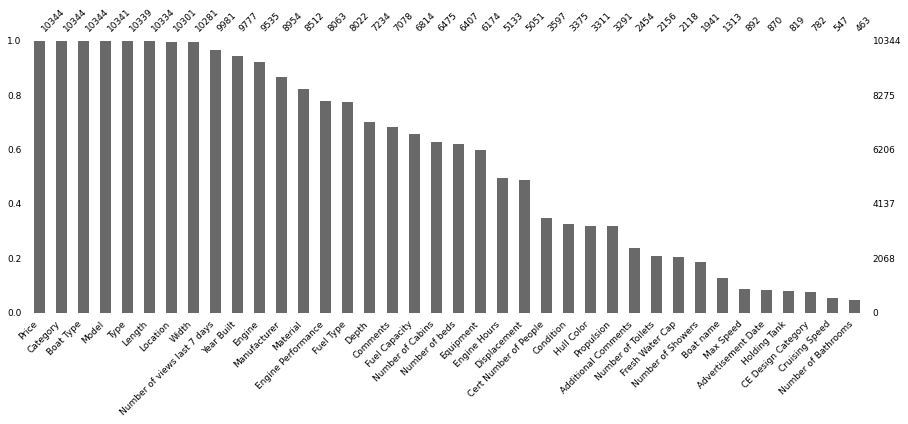

In [10]:
# visualise the number of missing variables for each column

missingno.bar(df, sort="descending", figsize=(15,5), fontsize=9) # we can see the "Number of bathrooms" has the most missing values

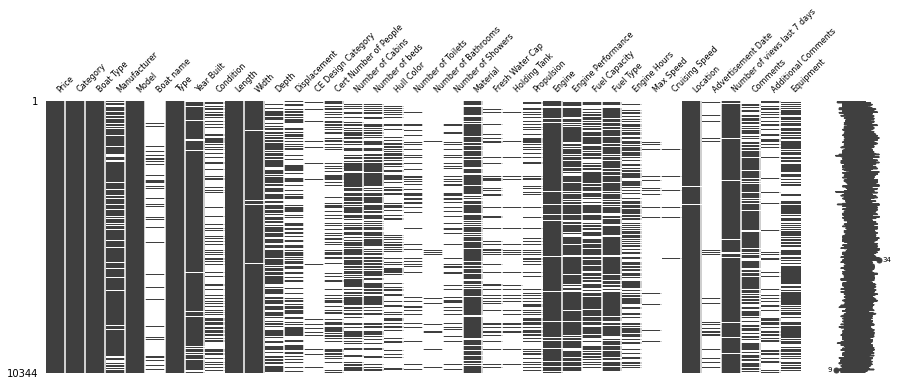

In [11]:
# a graphic that helps you to viualise the missing values at observation level
# each small black dash is an observation, if it's blank it means there is a missing value (aka NA)

missingno.matrix(df,figsize=(15,5), fontsize=8);

# Data cleaning

In [12]:
df = df.drop(columns='Cruising Speed') # Category has just one category

In [13]:
# Let's delete the features that we can't use:
list_col_to_delete_part1 = ["Displacement", "Number of views last 7 days", "Comments", "Additional Comments"]

df.drop(columns = list_col_to_delete_part1, inplace = True)

In [14]:
print('after droping some columns the df has thiese dimensions: ')
df.shape

after droping some columns the df has thiese dimensions: 


(10344, 33)

In [15]:
df.columns

Index(['Price', 'Category', 'Boat Type', 'Manufacturer', 'Model', 'Boat name',
       'Type', 'Year Built', 'Condition', 'Length', 'Width', 'Depth',
       'CE Design Category', 'Cert Number of People', 'Number of Cabins',
       'Number of beds', 'Hull Color', 'Number of Toilets',
       'Number of Bathrooms', 'Number of Showers', 'Material',
       'Fresh Water Cap', 'Holding Tank', 'Propulsion', 'Engine',
       'Engine Performance', 'Fuel Capacity', 'Fuel Type', 'Engine Hours',
       'Max Speed', 'Location', 'Advertisement Date', 'Equipment'],
      dtype='object')

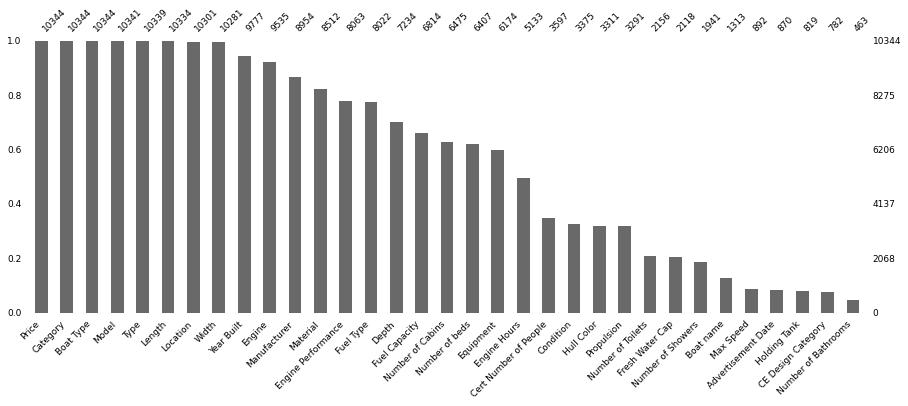

In [16]:
missingno.bar(df, sort="descending", figsize=(15,5), fontsize=9)

In [17]:
df.head(5)

Price     Category            Boat Type          Manufacturer  \
0   CHF 3.337,-  Power Boats          Motor Yacht  Rigiflex power boats   
1   EUR 3.490,-  Power Boats  Center console boat     Terhi power boats   
2   CHF 3.770,-  Power Boats           Sport Boat    Marine power boats   
3  DKK 25.900,-  Power Boats           Sport Boat    Pioner power boats   
4  SEK 35.000,-  Power Boats              Classic                   NaN   

                        Model Boat name                 Type  Year Built  \
0                     CAP 400       NaN  new boat from stock      2017.0   
1                       400 C       NaN  new boat from stock      2020.0   
2             370 S - Aluboot       NaN  new boat from stock         NaN   
3  10 Classic Special Edition       NaN  new boat from stock      2020.0   
4          Gullholmensnipa 21       NaN            Used boat      1974.0   

  Condition  Length   Width   Depth CE Design Category  Cert Number of People  \
0    as new  4.00 m  1.90 m     NaN                NaN                    7.0   
1       new  4.00 m  1.50 m     NaN                NaN                    NaN   
2       NaN  3.69 m  1.42 m  0.25 m                NaN                    4.0   
3       NaN  3.00 m  1.00 m     NaN                NaN                    NaN   
4      good  6.30 m  2.50 m  0.75 m                NaN                    NaN   

   Number of Cabins  Number of beds Hull Color  Number of Toilets  \
0               NaN             NaN      white                NaN   
1               NaN             NaN        NaN                NaN   
2               NaN             NaN        NaN                NaN   
3               NaN             NaN        NaN                NaN   
4               NaN             2.0        NaN                NaN   

   Number of Bathrooms  Number of Showers       Material Fresh Water Cap  \
0                  NaN                NaN            NaN             NaN   
1                  NaN                NaN  Thermoplastic             NaN   
2                  NaN                NaN      Aluminium             NaN   
3                  NaN                NaN            NaN             NaN   
4                  NaN                NaN            NaN             NaN   

  Holding Tank          Propulsion                               Engine  \
0          NaN                 NaN                                  NaN   
1          NaN                 NaN                                  NaN   
2          NaN                 NaN   (Permission for Lake of Constance)   
3          NaN                 NaN                                  NaN   
4          NaN  Inboard with Shaft                   VolvoPenta MD 2002   

  Engine Performance Fuel Capacity Fuel Type Engine Hours Max Speed  \
0                NaN           NaN       NaN          NaN       NaN   
1                NaN           NaN       NaN          NaN       NaN   
2                NaN           NaN       NaN          NaN       NaN   
3                NaN           NaN       NaN          NaN       NaN   
4  1 x 18 HP / 13 kW          50 l       NaN        500 h       NaN   

                                  Location Advertisement Date  \
0      Switzerland » Lake Geneva » Vésenaz                NaN   
1                   Germany » Bönningstedt                NaN   
2  Switzerland » Lake of Zurich » Stäfa ZH                NaN   
3                      Denmark » Svendborg                NaN   
4                Nordsee » Västra Frölunda         04.07.2020   

                                           Equipment  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C...

##  Advertisement Date


Advertisment Date

In [18]:
df['Advertisement Date'].unique()

array([nan, '04.07.2020', '02.06.2020', '22.07.2020', '06.07.2020',
       '26.06.2020', '07.07.2020', '14.07.2020', '17.07.2020',
       '15.07.2020', '13.07.2020', '20.07.2020', '25.07.2020',
       '16.06.2020', '25.06.2020', '21.06.2020', '23.07.2020',
       '15.06.2020', '17.06.2020', '29.06.2020', '24.07.2020',
       '19.06.2020', '18.06.2020', '04.06.2020', '01.07.2020',
       '16.07.2020', '03.06.2020', '12.06.2020', '11.07.2020',
       '21.07.2020', '22.06.2020', '07.06.2020', '27.07.2020',
       '30.05.2020', '02.07.2020', '24.05.2020', '27.06.2020',
       '12.07.2020', '19.07.2020', '08.06.2020', '01.06.2020',
       '28.06.2020', '10.07.2020', '12.04.2020', '16.05.2020',
       '18.05.2020', '31.05.2020', '29.05.2020', '09.07.2020',
       '26.07.2020', '05.04.2020', '01.05.2020', '03.07.2020',
       '14.06.2020', '05.06.2020', '05.07.2020', '06.06.2020',
       '30.06.2020', '09.06.2020', '24.06.2020', '23.06.2020',
       '11.06.2020', '25.05.2020', '08.07.2020', '

In [19]:
## Add element in the database for EDUCATIONAL PURPOSE ONLY
# Add random date in order to do a proper temporal split
df['Advertisement Date'] = pd.to_datetime(df['Advertisement Date'], format='%d.%m.%Y')
#Here is a function that will automatically create a feature of random dates between a defined interval
def random_datetimes_or_dates(start, end, out_format='datetime', n=10): 

    '''   
    unix timestamp is in ns by default. 
    I divide the unix time value by 10**9 to make it seconds 
    (or 24*60*60*10**9 to make it days).
    The corresponding unit variable is passed to 
    the pd.to_datetime function. 
    Values for the (divide_by, unit) pair to select is defined by 
    the out_format parameter.
    for 1 -> out_format='datetime'
    for 2 -> out_format=anything else
    '''
    (divide_by, unit) = (10**9, 's') if out_format=='datetime' else (24*60*60*10**9, 'D')

    start_u = start.value//divide_by
    end_u = end.value//divide_by

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit=unit)


In [20]:

np.random.seed(893717398)
# Set parameters
d_start = pd.to_datetime('2020-01-01')
d_end = pd.to_datetime('2021-12-31')

# Delete initial Advertisement Date -> if you want to keep the inital dates, don't run it
df.drop(columns=['Advertisement Date'], inplace=True)

# Run function
df['Advertisement Date'] = random_datetimes_or_dates(d_start, d_end, out_format='datetime', n=len(df))

# Keep the date and remove the time
df['Advertisement Date']= df['Advertisement Date'].dt.date

# Parse the date
df['Advertisement Date'] = pd.to_datetime(df['Advertisement Date'], format='%Y-%m-%d')

# Impute Advertissement Date by the the created one when they are missing
#df['Advertisement Date'] = np.where(df['Advertisement Date'].isna(), df['date2'], df['Advertisement Date'])

# Delete the random date created
#df.drop(columns=['date2'], inplace=True)

# Create duplicates
temp = df.sample(n=500, random_state=893717398)
df = df.append(temp)
del(temp)
df.reset_index(drop=True, inplace=True)

df['Advertisement Date'] = df['Advertisement Date'].astype(str)

In [21]:
# Need to parse the date
# For the moment, python understand Advertisement Date as a chain of characters
# You need to tell him that this is a Date
df['Advertisement Date'] = pd.to_datetime(df['Advertisement Date'], format="%Y-%m-%d") 

In [22]:
df['Advertisement Date'].head()

0   2021-08-11
1   2020-08-19
2   2021-01-06
3   2020-08-01
4   2021-05-05
Name: Advertisement Date, dtype: datetime64[ns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10844 entries, 0 to 10843
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Price                  10844 non-null  object        
 1   Category               10844 non-null  object        
 2   Boat Type              10844 non-null  object        
 3   Manufacturer           9393 non-null   object        
 4   Model                  10841 non-null  object        
 5   Boat name              1370 non-null   object        
 6   Type                   10839 non-null  object        
 7   Year Built             10252 non-null  float64       
 8   Condition              3540 non-null   object        
 9   Length                 10834 non-null  object        
 10  Width                  10779 non-null  object        
 11  Depth                  7575 non-null   object        
 12  CE Design Category     828 non-null    object        
 13  C

In [24]:
df['Length'].unique()
df['Engine Hours'].unique()
df['Fresh Water Cap'].unique()


array([nan, '70 l', '205 l', '100 l', '40 l', '60 l', '80 l', '50 l',
       '250 l', '200 l', '160 l', '35 l', '150 l', '75 l', '180 l',
       '30 l', '280 l', '43 l', '120 l', '340 l', '45 l', '38 l', '300 l',
       '20 l', '130 l', '108 l', '114 l', '400 l', '65 l', '500 l',
       '55 l', '133 l', '600 l', '700 l', '90 l', '47 l', '37 l', '800 l',
       '32 l', '78 l', '125 l', '380 l', '165 l', '1100 l', '42 l',
       '56 l', '110 l', '350 l', '76 l', '1000 l', '290 l', '450 l',
       '240 l', '900 l', '220 l', '68 l', '155 l', '1200 l', '82 l',
       '113 l', '225 l', '170 l', '188 l', '520 l', '135 l', '330 l',
       '325 l', '190 l', '74 l', '576 l', '98 l', '106 l', '389 l',
       '2000 l', '227 l', '430 l', '650 l', '215 l', '333 l', '1400 l',
       '588 l', '73 l', '378 l', '370 l', '1025 l', '470 l', '750 l',
       '640 l', '1300 l', '425 l', '212 l', '720 l', '320 l', '107 l',
       '550 l', '375 l', '285 l', '560 l', '270 l', '436 l', '360 l',
       '1800 l', 

In [25]:
# Delete the chain ' m'
df['Length'] = df['Length'].str.rstrip(' m')

# Convert Series in numeric
df['Length'] = pd.to_numeric(df['Length'])

df['Length'].head()

0    4.00
1    4.00
2    3.69
3    3.00
4    6.30
Name: Length, dtype: float64

In [26]:
def format_series(series, char):
    
    new_series = series.str.rstrip(char)
    new_series = pd.to_numeric(new_series)
    
    return new_series

In [27]:
for col in ['Width', 'Depth']:
    df[col] = format_series(df[col], ' m')

df["Engine Hours"] = format_series(df["Engine Hours"], ' h')

for col in ['Fresh Water Cap', 'Holding Tank', 'Fuel Capacity']:
    df[col] = format_series(df[col], ' l')
    
df[['Length', 'Width', 'Depth']].head()

df = df.rename(columns={'Length':'Length (m)', 'Width':'Width (m)', 'Depth':'Depth (m)',
                        'Fresh Water Cap':'Fresh Water Cap (l)', 'Holding Tank':'Holding Tank (l)', 'Fuel Capacity':'Fuel Capacity (l)'})



In [28]:
df.head(5)

Price     Category            Boat Type          Manufacturer  \
0   CHF 3.337,-  Power Boats          Motor Yacht  Rigiflex power boats   
1   EUR 3.490,-  Power Boats  Center console boat     Terhi power boats   
2   CHF 3.770,-  Power Boats           Sport Boat    Marine power boats   
3  DKK 25.900,-  Power Boats           Sport Boat    Pioner power boats   
4  SEK 35.000,-  Power Boats              Classic                   NaN   

                        Model Boat name                 Type  Year Built  \
0                     CAP 400       NaN  new boat from stock      2017.0   
1                       400 C       NaN  new boat from stock      2020.0   
2             370 S - Aluboot       NaN  new boat from stock         NaN   
3  10 Classic Special Edition       NaN  new boat from stock      2020.0   
4          Gullholmensnipa 21       NaN            Used boat      1974.0   

  Condition  Length (m)  Width (m)  Depth (m) CE Design Category  \
0    as new        4.00       1.90        NaN                NaN   
1       new        4.00       1.50        NaN                NaN   
2       NaN        3.69       1.42       0.25                NaN   
3       NaN        3.00       1.00        NaN                NaN   
4      good        6.30       2.50       0.75                NaN   

   Cert Number of People  Number of Cabins  Number of beds Hull Color  \
0                    7.0               NaN             NaN      white   
1                    NaN               NaN             NaN        NaN   
2                    4.0               NaN             NaN        NaN   
3                    NaN               NaN             NaN        NaN   
4                    NaN               NaN             2.0        NaN   

   Number of Toilets  Number of Bathrooms  Number of Showers       Material  \
0                NaN                  NaN                NaN            NaN   
1                NaN                  NaN                NaN  Thermoplastic   
2                NaN                  NaN                NaN      Aluminium   
3                NaN                  NaN                NaN            NaN   
4                NaN                  NaN                NaN            NaN   

   Fresh Water Cap (l)  Holding Tank (l)          Propulsion  \
0                  NaN               NaN                 NaN   
1                  NaN               NaN                 NaN   
2                  NaN               NaN                 NaN   
3                  NaN               NaN                 NaN   
4                  NaN               NaN  Inboard with Shaft   

                                Engine Engine Performance  Fuel Capacity (l)  \
0                                  NaN                NaN                NaN   
1                                  NaN                NaN                NaN   
2   (Permission for Lake of Constance)                NaN                NaN   
3                                  NaN                NaN                NaN   
4                   VolvoPenta MD 2002  1 x 18 HP / 13 kW               50.0   

  Fuel Type  Engine Hours Max Speed                                 Location  \
0       NaN           NaN       NaN      Switzerland » Lake Geneva » Vésenaz   
1       NaN           NaN       NaN                   Germany » Bönningstedt   
2       NaN           NaN       NaN  Switzerland » Lake of Zurich » Stäfa ZH   
3       NaN           NaN       NaN                      Denmark » Svendborg   
4       NaN         500.0       NaN                Nordsee » Västra Frölunda   

                                           Equipment Advertisement Date  
0                                                NaN         2021-08-11  
1                                                NaN         2020-08-19  
2                                                NaN         2021-01-06  
3                                                NaN         2020-08-01  
4  Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C...         2

## Split


In [29]:
# Now let's split the data in 2 parts for the moment:
# train_val & test
# Split will be done on a temporal basis
df.set_index(['Advertisement Date']).resample('M').size()

Advertisement Date
2020-01-31    442
2020-02-29    463
2020-03-31    447
2020-04-30    426
2020-05-31    478
2020-06-30    422
2020-07-31    468
2020-08-31    500
2020-09-30    464
2020-10-31    433
2020-11-30    415
2020-12-31    470
2021-01-31    463
2021-02-28    407
2021-03-31    475
2021-04-30    456
2021-05-31    484
2021-06-30    434
2021-07-31    443
2021-08-31    431
2021-09-30    428
2021-10-31    517
2021-11-30    437
2021-12-31    441
Freq: M, dtype: int64

In [30]:
# Let's have Train & Validation for the data of 2020 and Test for the data of 2021
train_val = df[df['Advertisement Date'] < '2021-01-01'].reset_index(drop=True)

# Création du test
test = df[df['Advertisement Date'] >= '2021-01-01'].reset_index(drop=True)

The fundamental hypothesis for every predictive modeling is the independancy all the observations. However, algorithms will put a highest weight / importance to the some observation.

First step is to identify the duplicates.

When all the features have the same values for several observations, it is what I call 'true duplicates'. To treat them, we can keep the fist value.

## Duplicates

In [31]:
train_val.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
5423     True
5424     True
5425     True
5426     True
5427     True
Length: 5428, dtype: bool

In [32]:
print(f'The database has {train_val[train_val.duplicated(keep=False)].shape[0]} true duplicates')


The database has 488 true duplicates


In [33]:
train_val[train_val.duplicated(keep=False)].sort_values(by='Model')[:10] 

Price     Category                             Boat Type  \
4746   EUR 25.000,-  Power Boats                           Motor Yacht   
5241   EUR 25.000,-  Power Boats                           Motor Yacht   
5246  EUR 229.000,-  Power Boats                               Trawler   
2643  EUR 229.000,-  Power Boats                               Trawler   
2203  EUR 440.000,-  Power Boats  Cabin Boat,Motor Yacht,Offshore Boat   
5301  EUR 440.000,-  Power Boats  Cabin Boat,Motor Yacht,Offshore Boat   
5372   CHF 34.150,-  Power Boats                              Bowrider   
4581   CHF 34.150,-  Power Boats                              Bowrider   
5305   EUR 69.000,-  Power Boats                   Classic,Motor Yacht   
3783   EUR 69.000,-  Power Boats                   Classic,Motor Yacht   

                 Manufacturer       Model Boat name                      Type  \
4746       Altena power boats          10   Mulmeli                 Used boat   
5241       Altena power boats          10   Mulmeli                 Used boat   
5246       Altena power boats  126 Family  Aventura          Used boat,Diesel   
2643       Altena power boats  126 Family  Aventura          Used boat,Diesel   
2203  Performance power boats        1307       NaN  , ,, ,Used boat,Unleaded   
5301  Performance power boats        1307       NaN  , ,, ,Used boat,Unleaded   
5372          AMT power boats      175 BR       NaN       new boat from stock   
4581          AMT power boats      175 BR       NaN       new boat from stock   
5305     Spertini power boats        18 m       NaN       , ,Used boat,Diesel   
3783     Spertini power boats        18 m       NaN       , ,Used boat,Diesel   

      Year Built  Condition  Length (m)  Width (m)  Depth (m)  \
4746      1972.0        NaN       10.00       3.20       1.10   
5241      1972.0        NaN       10.00       3.20       1.10   
5246      2012.0        NaN       12.66       3.95       1.27   
2643      2012.0        NaN       12.66       3.95       1.27   
2203      2013.0  very good       13.33       3.40       1.00   
5301      2013.0  very good       13.33       3.40       1.00   
5372      2019.0     as new        5.15       2.08       0.60   
4581      2019.0     as new        5.15       2.08       0.60   
5305      1977.0       used       18.00       5.35       1.30   
3783      1977.0       used       18.00       5.35       1.30   

     CE Design Category  Cert Number of People  Number of Cabins  \
4746                NaN                    NaN               NaN   
5241                NaN                    NaN               NaN   
5246                NaN                    NaN               NaN   
2643                NaN                    NaN               NaN   
2203                NaN                   12.0               2.0   
5301                NaN                   12.0               2.0   
5372                NaN                    6.0               NaN   
4581                NaN                    6.0               NaN   
5305          A - Ocean                   10.0               3.0   
3783          A - Ocean                   10.0               3.0   

      Number of beds   Hull Color  Number of Toilets  Number of Bathrooms  \
4746             2.0        White                NaN                  NaN   
5241             2.0        White                NaN                  NaN   
5246             3.0        Beige                NaN                  NaN   
2643             3.0        Beige                NaN                  NaN   
2203             6.0          NaN                NaN                  2.0   
5301             6.0          NaN                NaN                  2.0   
5372             NaN  white white                NaN                  NaN   
4581             NaN  white white                NaN                  NaN   
5305             6.0  white white                2.0                  NaN   
3783             6.0  white white                2.0                  Na

In [34]:
train_val = train_val.drop_duplicates(keep='first')

Now let's identify the false duplicates.
In general we have a unique ID for a client, given that it is not the case in this databse, we will consider that an observation is unique if the observation are the same for those 5 features: ['Model', 'Type', 'Year Built','Location', 'Equipment']

In [35]:
# 5 features to represents a unique boat.
features_analyze_duplicates = ['Model', 'Type', 'Year Built','Location', 'Equipment']

# sort the features for a better display of the false duplicates
cols_sort = features_analyze_duplicates + [col for col in train_val.columns if col not in features_analyze_duplicates]

# false duplicates
train_val[train_val.duplicated(subset = features_analyze_duplicates, keep=False)][cols_sort].sort_values(by='Model')[:10]

Model                          Type  Year Built  \
687            210  new boat from stock,Unleaded      2020.0   
686            210  new boat from stock,Unleaded      2020.0   
667            210  new boat from stock,Unleaded      2020.0   
666            210  new boat from stock,Unleaded      2020.0   
3717     29 Ft. OC                     Used boat      2001.0   
775      29 Ft. OC                     Used boat      2001.0   
2580  440 GOLDSTAR                     Used boat      2010.0   
2575  440 GOLDSTAR                     Used boat      2010.0   
82      465 Trader           new boat from stock      2019.0   
5146    465 Trader           new boat from stock      2019.0   

                                      Location  \
687          Germany » Berlin » Sea Ray Berlin   
686          Germany » Berlin » Sea Ray Berlin   
667          Germany » Berlin » Sea Ray Berlin   
666          Germany » Berlin » Sea Ray Berlin   
3717             Netherlands » In verkoophaven   
775              Netherlands » In verkoophaven   
2580  Italy » Marche - Umbria » Ancona, Marche   
2575  Italy » Marche - Umbria » Ancona, Marche   
82                         Denmark » Svendborg   
5146                       Denmark » Svendborg   

                                              Equipment          Price  \
687                                                 NaN   EUR 63.380,-   
686                                                 NaN   EUR 63.380,-   
667                                                 NaN   EUR 60.040,-   
666                                                 NaN   EUR 60.040,-   
3717                                                NaN   EUR 72.500,-   
775                                                 NaN   EUR 74.500,-   
2580  Air Conditioning,Autopilot,Bow Thruster,Compas...  EUR 249.000,-   
2575  Air Conditioning,Autopilot,Bow Thruster,Compas...  EUR 249.000,-   
82                                                  NaN   DKK 89.000,-   
5146                                                NaN   DKK 52.000,-   

         Category    Boat Type                  Manufacturer  Boat name  \
687   Power Boats     Bowrider           Sea Ray power boats  Wakeboard   
686   Power Boats     Bowrider           Sea Ray power boats  Wakeboard   
667   Power Boats     Bowrider           Sea Ray power boats        NaN   
666   Power Boats     Bowrider           Sea Ray power boats        NaN   
3717  Power Boats      Classic           Rapsody power boats      Skoet   
775   Power Boats      Classic           Rapsody power boats     Viskus   
2580  Power Boats  Motor Yacht  Cantieri Estensi power boats        NaN   
2575  Power Boats  Motor Yacht  Cantieri Estensi power boats        NaN   
82    Power Boats   Sport Boat          Crescent power boats        NaN   
5146  Power Boats   Sport Boat          Crescent power boats        NaN   

     Condition  Length (m)  Width (m)  Depth (m) CE Design Category  \
687        NaN        6.55       2.54       0.86                NaN   
686        NaN        6.55       2.54       0.86                NaN   
667        NaN        6.55       2.54       0.86                NaN   
666        NaN        6.55       2.54       0.86                NaN   
3717       NaN        8.74       2.45       0.65                NaN   
775        NaN        8.74       2.45       0.65                NaN   
2580       NaN       13.65       4.25       1.20                NaN   
2575       NaN       13.65       4.25       1.20                NaN   
82         NaN        4.00       1.00        NaN                NaN   
5146       NaN        4.00        NaN        NaN                NaN   

      Cert Number of People  Number of Cabins  Number of beds Hull Color  \
687                     NaN               NaN             NaN        NaN   
686                     NaN               NaN             NaN        NaN   
667                     NaN               NaN             NaN        NaN   
666                     NaN   

The first 4 lines are duplicated, they represents the same boat. However in this database the price is changing. Keep in mind that in some database all values of features could change / evolve.

Given the fact that we are trying to predict the price of boats given their characteristics, we could take the most recent price, we could take a random price within the existing ones, here, we will use the average price.

The problem is that the `Price` is not in the same currency and it is not in a numerical features so we need to transform it.

## Price conversion

In [36]:
train_val['Price'].unique()

array(['EUR 3.490,-', 'DKK 25.900,-', 'EUR 3.399,-', ..., 'EUR 4.516,-',
       'EUR 4.499,-', 'CHF 3.780,-'], dtype=object)

In [37]:
# First, delete the price having the value `Price on request`
train_val = train_val[train_val['Price'] != 'Price on request']

In [38]:
# Create a conversion table
create_change = {'Currency_A': ['EUR', 'GBP', 'DKK', 'SEK', 'USD', 'CHF'], 
               'Currency_B': ['CHF', 'CHF', 'CHF', 'CHF', 'CHF', 'CHF'], 
               'Change': [1.05, 1.24, 0.14, 0.11, 0.92, 1]}

change = pd.DataFrame(data=create_change)
change

Currency_A Currency_B  Change
0        EUR        CHF    1.05
1        GBP        CHF    1.24
2        DKK        CHF    0.14
3        SEK        CHF    0.11
4        USD        CHF    0.92
5        CHF        CHF    1.00

In [39]:
dict_change = dict(zip(change.iloc[:,0], change.iloc[:,2]))
dict_change

{'EUR': 1.05, 'GBP': 1.24, 'DKK': 0.14, 'SEK': 0.11, 'USD': 0.92, 'CHF': 1.0}

In [40]:
data_part = train_val['Price'].str.partition(' ')
data_part[0] = data_part[0].str.replace('£', 'GBP')
data_part[2] = data_part[2].str.replace('.', '')
data_part[2] = data_part[2].str.replace(',-', '')
data_part[2] = data_part[2].astype(float, errors='raise')

# Price conversion
new_price = data_part.apply(lambda x: dict_change[x[0]] * x[2], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
new_price = pd.DataFrame(new_price, columns=['Price_CHF'])
train_val = new_price.merge(train_val, left_index=True, right_index=True)

In [42]:
train_val.head(10)

Price_CHF         Price     Category            Boat Type  \
0    3664.50   EUR 3.490,-  Power Boats  Center console boat   
1    3626.00  DKK 25.900,-  Power Boats           Sport Boat   
2    3568.95   EUR 3.399,-  Power Boats         Fishing Boat   
3    3500.00   CHF 3.500,-  Power Boats           Sport Boat   
4    3480.00   CHF 3.480,-  Power Boats         Fishing Boat   
5    4400.00   CHF 4.400,-  Power Boats            Deck Boat   
6    4200.00  DKK 30.000,-  Power Boats           Sport Boat   
7    4200.00   EUR 4.000,-  Power Boats           Cabin Boat   
8    4267.00   CHF 4.267,-  Power Boats         Fishing Boat   
9    4126.50   EUR 3.930,-  Power Boats           Sport Boat   

                                 Manufacturer  \
0                           Terhi power boats   
1                          Pioner power boats   
2                          Linder power boats   
3                      Four Winns power boats   
4                          Marine power boats   
5                          Buster power boats   
6                                         NaN   
7                                         NaN   
8  Quicksilver (Brunswick Marine) power boats   
9                          Linder power boats   

                             Model Boat name                          Type  \
0                            400 C       NaN           new boat from stock   
1       10 Classic Special Edition       NaN           new boat from stock   
2                    355 Sportsman       NaN           new boat from stock   
3                      170 Freedom       NaN            Used boat,Unleaded   
4        14 M - Ruder u. Motorboot       NaN           new boat from stock   
5                       Mini Sport       NaN  new boat from stock,Unleaded   
6                    With 15 Vital       NaN                     Used boat   
7                       Backdecker       NaN            Used boat,Unleaded   
8                         360 Fish       NaN  new boat from stock,Unleaded   
9  440 Fishing mit 2,5 PS Alu-Boot       NaN  new boat from stock,Unleaded   

   Year Built Condition  Length (m)  Width (m)  Depth (m) CE Design Category  \
0      2020.0       new        4.00       1.50        NaN                NaN   
1      2020.0       NaN        3.00       1.00        NaN                NaN   
2      2019.0       new        3.55       1.46        NaN                NaN   
3      1991.0      good        5.60       2.20        NaN                NaN   
4         NaN       NaN        4.13       1.41        NaN                NaN   
5         NaN       new        3.88       1.49        NaN                NaN   
6      1985.0       NaN        4.00       1.00        NaN                NaN   
7      2011.0      good        6.37       2.31       0.45                NaN   
8         NaN       NaN        3.78       1.71        NaN                NaN   
9      2020.0       NaN        4.31       1.64        NaN                NaN   

   Cert Number of People  Number of Cabins  Number of beds Hull Color  \
0                    NaN               NaN             NaN        NaN   
1                    NaN               NaN             NaN        NaN   
2                    4.0               NaN             NaN        NaN   
3                    6.0               NaN             NaN        NaN   
4                    4.0               NaN             NaN        NaN   
5                    3.0               NaN             NaN  grey grey   
6                    NaN               NaN             NaN        NaN   
7                    3.0               2.0             3.0        NaN   
8                    3.0               NaN             NaN      white   
9                    NaN               NaN             NaN        NaN   

   Number of Toilets  Number of Bathrooms  Number of Showers       Material  \
0                NaN                  NaN                NaN  Thermoplastic   
1                NaN                  NaN               

Add IDs

In [43]:
duplicated_boat = train_val[train_val.duplicated(subset=features_analyze_duplicates, keep=False)].reset_index(drop=True)
train_val = train_val[~train_val.duplicated(subset=features_analyze_duplicates, keep=False)].reset_index(drop=True)

In [44]:
duplicated_boat['dupkey_id'] = duplicated_boat.groupby(by=features_analyze_duplicates, sort=False, dropna=False).ngroup()+1

In [45]:
duplicated_boat[['dupkey_id', 'Price_CHF'] + cols_sort].sort_values(by='dupkey_id')[:4]

dupkey_id  Price_CHF                    Model                 Type  \
0           1    12460.0               465 Trader  new boat from stock   
58          1     7280.0               465 Trader  new boat from stock   
1           2    12460.0  Fjordjollen 500 Classic  new boat from stock   
55          2    17920.0  Fjordjollen 500 Classic  new boat from stock   

    Year Built             Location Equipment          Price     Category  \
0       2019.0  Denmark » Svendborg       NaN   DKK 89.000,-  Power Boats   
58      2019.0  Denmark » Svendborg       NaN   DKK 52.000,-  Power Boats   
1       2020.0  Denmark » Svendborg       NaN   DKK 89.000,-  Power Boats   
55      2020.0  Denmark » Svendborg       NaN  DKK 128.000,-  Power Boats   

     Boat Type          Manufacturer Boat name Condition  Length (m)  \
0   Sport Boat  Crescent power boats       NaN       NaN         4.0   
58  Sport Boat  Crescent power boats       NaN       NaN         4.0   
1       Launch                   NaN       NaN       NaN         4.0   
55      Launch                   NaN       NaN       NaN         4.0   

    Width (m)  Depth (m) CE Design Category  Cert Number of People  \
0         1.0        NaN                NaN                    NaN   
58        NaN        NaN                NaN                    NaN   
1         2.0        NaN                NaN                    NaN   
55        2.0        NaN                NaN                    NaN   

    Number of Cabins  Number of beds Hull Color  Number of Toilets  \
0                NaN             NaN        NaN                NaN   
58               NaN             NaN        NaN                NaN   
1                NaN             NaN        NaN                NaN   
55               NaN             NaN        NaN                NaN   

    Number of Bathrooms  Number of Showers Material  Fresh Water Cap (l)  \
0                   NaN                NaN      NaN                  NaN   
58                  NaN                NaN      NaN                  NaN   
1                   NaN                NaN      NaN                  NaN   
55                  NaN                NaN      NaN                  NaN   

    Holding Tank (l) Propulsion          Engine Engine Performance  \
0                NaN        NaN  Yamaha F25GETL  1 x 25 HP / 18 kW   
58               NaN        NaN             NaN                NaN   
1                NaN        NaN   Yamaha F15CEL  1 x 15 HP / 11 kW   
55               NaN        NaN  Yamaha F30BETL  1 x 30 HP / 22 kW   

    Fuel Capacity (l) Fuel Type  Engine Hours Max Speed Advertisement Date  
0                 NaN       NaN           NaN       NaN         2020-03-04  
58                NaN       NaN           NaN       NaN         2020-07-05  
1                 NaN       NaN           NaN       NaN         2020-08-01  
55                NaN       NaN           NaN       NaN         2020-01-11

In [46]:
mean_Price = pd.DataFrame(duplicated_boat.groupby(by=['dupkey_id'], dropna=False)['Price_CHF'].mean()).reset_index(drop=True)

In [47]:
duplicated_boat = duplicated_boat.drop_duplicates(subset='dupkey_id', keep='first').reset_index(drop=True)

In [48]:
duplicated_boat.drop(columns='Price_CHF', inplace=True)

In [49]:
duplicated_boat_clean = duplicated_boat.merge(mean_Price, how='left', left_index=True, right_index=True)
duplicated_boat_clean.head()

Price     Category   Boat Type          Manufacturer  \
0  DKK 89.000,-  Power Boats  Sport Boat  Crescent power boats   
1  DKK 89.000,-  Power Boats      Launch                   NaN   
2  DKK 94.990,-  Power Boats      Launch                   NaN   
3  EUR 16.219,-  Power Boats   Deck Boat  Jeanneau power boats   
4  CHF 26.000,-  Power Boats  Sport Boat     Windy power boats   

                        Model Boat name                          Type  \
0                  465 Trader       NaN           new boat from stock   
1     Fjordjollen 500 Classic       NaN           new boat from stock   
2       Fjordjollen 470 Sport       NaN           new boat from stock   
3  CAP CAMARAT 5.5 WA SERIE 2       NaN  new boat from stock,Unleaded   
4                        7500       NaN            Used boat,Unleaded   

   Year Built Condition  Length (m)  Width (m)  Depth (m) CE Design Category  \
0      2019.0       NaN        4.00       1.00        NaN                NaN   
1      2020.0       NaN        4.00       2.00        NaN                NaN   
2      2020.0       NaN        4.00       1.00        NaN                NaN   
3         NaN       NaN        5.48       2.36        NaN                NaN   
4      1990.0      good        7.55       2.51        NaN                NaN   

   Cert Number of People  Number of Cabins  Number of beds   Hull Color  \
0                    NaN               NaN             NaN          NaN   
1                    NaN               NaN             NaN          NaN   
2                    NaN               NaN             NaN          NaN   
3                    NaN               1.0             NaN          NaN   
4                    8.0               NaN             NaN  white white   

   Number of Toilets  Number of Bathrooms  Number of Showers Material  \
0                NaN                  NaN                NaN      NaN   
1                NaN                  NaN                NaN      NaN   
2                NaN                  NaN                NaN      NaN   
3                NaN                  NaN                NaN      GRP   
4                NaN                  NaN                NaN      GRP   

   Fresh Water Cap (l)  Holding Tank (l)  Propulsion             Engine  \
0                  NaN               NaN         NaN     Yamaha F25GETL   
1                  NaN               NaN         NaN      Yamaha F15CEL   
2                  NaN               NaN         NaN      Yamaha F20GEL   
3                  NaN               NaN         NaN                NaN   
4                  NaN               NaN  Sterndrive  Volvo Penta 570 A   

    Engine Performance  Fuel Capacity (l) Fuel Type  Engine Hours Max Speed  \
0    1 x 25 HP / 18 kW                NaN       NaN           NaN       NaN   
1    1 x 15 HP / 11 kW                NaN       NaN           NaN       NaN   
2    1 x 20 HP / 15 kW                NaN       NaN           NaN       NaN   
3                  NaN                NaN  Unleaded           NaN       NaN   
4  1 x 245 HP / 180 kW                NaN  Unleaded           NaN       NaN   

                             Location Equipment Advertisement Date  dupkey_id  \
0                 Denmark » Svendborg       NaN         2020-03-04          1   
1                 Denmark » Svendborg       NaN         2020-08-01          2   
2                 Denmark » Svendborg       NaN         2020-05-16          3   
3                         Germany » 1       NaN         2020-10-13          4   
4  Switzerland » Luganersee » Caslano       NaN         2020-12-06          5   

   Price_CHF  
0    9870.00  
1   15190.00  
2   14348.60  
3   24821.65  
4   21500.00

In [50]:
print(train_val.shape)
train_val.columns

(5100, 34)


Index(['Price_CHF', 'Price', 'Category', 'Boat Type', 'Manufacturer', 'Model',
       'Boat name', 'Type', 'Year Built', 'Condition', 'Length (m)',
       'Width (m)', 'Depth (m)', 'CE Design Category', 'Cert Number of People',
       'Number of Cabins', 'Number of beds', 'Hull Color', 'Number of Toilets',
       'Number of Bathrooms', 'Number of Showers', 'Material',
       'Fresh Water Cap (l)', 'Holding Tank (l)', 'Propulsion', 'Engine',
       'Engine Performance', 'Fuel Capacity (l)', 'Fuel Type', 'Engine Hours',
       'Max Speed', 'Location', 'Equipment', 'Advertisement Date'],
      dtype='object')

In [51]:
print(duplicated_boat_clean.columns.shape)
duplicated_boat_clean.columns

(35,)


Index(['Price', 'Category', 'Boat Type', 'Manufacturer', 'Model', 'Boat name',
       'Type', 'Year Built', 'Condition', 'Length (m)', 'Width (m)',
       'Depth (m)', 'CE Design Category', 'Cert Number of People',
       'Number of Cabins', 'Number of beds', 'Hull Color', 'Number of Toilets',
       'Number of Bathrooms', 'Number of Showers', 'Material',
       'Fresh Water Cap (l)', 'Holding Tank (l)', 'Propulsion', 'Engine',
       'Engine Performance', 'Fuel Capacity (l)', 'Fuel Type', 'Engine Hours',
       'Max Speed', 'Location', 'Equipment', 'Advertisement Date', 'dupkey_id',
       'Price_CHF'],
      dtype='object')

In [52]:
train_val = pd.concat([train_val[cols_sort+['Price_CHF']] , duplicated_boat_clean[cols_sort+['Price_CHF']]] , axis=0  )

In [53]:
# Split train_val in train & val (for training & validation)
from sklearn.model_selection import train_test_split
train, validation = train_test_split(train_val, test_size=0.33, random_state=42)

In [54]:
train.shape

(3433, 34)

In [55]:
validation.shape

(1692, 34)

In [56]:
3433+1692

5125

In [57]:
len(train_val)

5125

In [58]:
5184-5125

59

In [59]:
train.columns

Index(['Model', 'Type', 'Year Built', 'Location', 'Equipment', 'Price',
       'Category', 'Boat Type', 'Manufacturer', 'Boat name', 'Condition',
       'Length (m)', 'Width (m)', 'Depth (m)', 'CE Design Category',
       'Cert Number of People', 'Number of Cabins', 'Number of beds',
       'Hull Color', 'Number of Toilets', 'Number of Bathrooms',
       'Number of Showers', 'Material', 'Fresh Water Cap (l)',
       'Holding Tank (l)', 'Propulsion', 'Engine', 'Engine Performance',
       'Fuel Capacity (l)', 'Fuel Type', 'Engine Hours', 'Max Speed',
       'Advertisement Date', 'Price_CHF'],
      dtype='object')

Let's start the descriptive analysis of the data. It allows to get the outliers/extreme values & missing values.
Let's start by separating the numerical features from the categoricals -> however some features such as `Engine Performance`, `Max Speed` and `Cruising Speed` have to be cleaned !

In [60]:
train[['Engine Performance', 'Max Speed']].head(2)

Engine Performance Max Speed
2447  2 x 220 HP / 162 kW       NaN
3443  2 x 330 HP / 243 kW       NaN

In [61]:
train['Max Speed'].unique()

array([nan, '27 knots', '32 knots', '9 knots', '39 knots', '33 knots',
       '38 knots', '17 knots', '31 knots', '34 knots', '23 knots',
       '35 knots', '40 knots', '30 knots', '12 knots', '11 knots',
       '20 knots', '28 knots', '24 knots', '65 knots', '8 knots',
       '66 km/h', '90 km/h', '29 knots', '6 knots', '42 knots',
       '45 knots', '36 knots', '50 knots', '21 knots', '15 km/h',
       '46 knots', '32 mph', '7 knots', '37 knots', '9 km/h', '45 km/h',
       '43 knots', '26 knots', '22 knots', '84 km/h', '69 knots',
       '25 knots', '18 km/h', '75 km/h', '95 km/h', '65 km/h', '5 knots',
       '15 knots', '17 km/h', '19 knots', '58 km/h', '35 km/h',
       '13 knots', '70 km/h', '10 knots', '62 km/h', '49 knots',
       '48 knots', '72 km/h', '47 knots'], dtype=object)

In [62]:
# Start with Engine Performance: there are nbr_motors horse_power and power_in_kW
# Let's extract this information
def find_between(s, start, end):
    
    # Extract chain of character between 2 chains of characters (start and end)
    middle_char = (s.split(start))[1].split(end)[0]
    
    # Delete unecessaries spaces
    middle_char = middle_char.strip()
    
    # Convert in integer
    middle_char = float(middle_char) 
    
    return middle_char

def find_nb_motors(s) : 
    
    # Extract the number of motors from the chain of characters
    return int(s[0])

In [63]:
# Let's test it with a simple example !
s = "2 x 220 HP / 162 kW"

print(f"Nbr motors : {find_nb_motors(s)}")
print(f"Nbr horses : {find_between(s, 'x', 'HP')}")
print(f"Power in kw : {find_between(s, '/', 'kW')}")

Nbr motors : 2
Nbr horses : 220.0
Power in kw : 162.0


In [64]:
# Extract number of motors
train["Number_motors"] = train['Engine Performance'].apply(lambda x : find_nb_motors(x) if str(x) != 'nan' else x)

# Extract number of horses per motor
train["horse_Power_per_engine"] = train['Engine Performance'].apply(lambda x : find_between(x, 'x', 'HP') if str(x) != 'nan' else x)

# Extract power in kW per motor
train["kW_per_engine"] = train['Engine Performance'].apply(lambda x : find_between(x, '/', 'kW') if str(x) != 'nan' else x)

train[['Engine Performance', "Number_motors", "horse_Power_per_engine", "kW_per_engine"]].head()

Engine Performance  Number_motors  horse_Power_per_engine  \
2447    2 x 220 HP / 162 kW            2.0                   220.0   
3443    2 x 330 HP / 243 kW            2.0                   330.0   
1897  2 x 2000 HP / 1471 kW            2.0                  2000.0   
319     2 x 255 HP / 188 kW            2.0                   255.0   
2409    2 x 360 HP / 265 kW            2.0                   360.0   

      kW_per_engine  
2447          162.0  
3443          243.0  
1897         1471.0  
319           188.0  
2409          265.0

In [65]:
# Now let's focus on the speed conversion
def convert_speed_knots(string, dict_conversion):
    
    """Allows to get the speed in knots from any speed unit with a conversion table.
    ----------    
    Parameters 
    string : Chain of characters containing the speed
    dict_change : Table of conversion
    ----------
    Output
    Chain of characters with the new speed feature converted
    """
    
    # Split the chain of characters in 2 by the space 
    list_speed = string.split()        # example : '62 km/h'  -> ['62', 'km/h']
        
    # Convert speed to float in order to do the conversion
    list_speed[0] = float(list_speed[0])
    
    # Convert the speed
    speed_in_knots = list_speed[0] * dict_conversion[list_speed[1]]
    
    return speed_in_knots

In [66]:
dict_knots_conversion = {
    'mph' : 0.868976,
    'km/h' : 0.539957,
    'knots' : 1
}

# Let's test the function
convert_speed_knots('100 mph', dict_knots_conversion)

86.8976

In [67]:
# Given the fact that we are applying the same treatment for Cruising Speed & Max Speed, we can automate the process with a loop
for col in [ "Max Speed"] :
    
    train[col+' (knots)'] = train[col].apply(lambda x : convert_speed_knots(x, dict_knots_conversion) if str(x) != 'nan' else x)

train[(train["Max Speed"].notna()) & (train["Max Speed"].str.contains('km'))][[#"Cruising Speed", "Max Speed (knots)", "Cruising Speed (knots)"
                                                                               "Max Speed"
                                                                                
                                                                               ]].head()

Max Speed
3647   66 km/h
2873   90 km/h
3245   15 km/h
5056    9 km/h
2442   45 km/h

In [68]:
# We delete the original features
train.drop(columns=[#"Cruising Speed", 
                    "Max Speed",
                    "Engine Performance"], inplace = True)

In [69]:
# Let's create the age of the boat
current_year = 2022

train['age_boat'] = current_year - train['Year Built']

train.drop(columns = ["Year Built"], inplace =True)


In [70]:
# Let's select the numerical & categorical features
col_categoricals = [col for col in train.columns if train[col].dtype=='O']

# Puis les numériques
col_numericals = [col for col in train.columns if col not in col_categoricals+['Advertisement Date']]

In [71]:
train[col_numericals].describe(percentiles=[.01, .25, .5, .75,.99]) 

Length (m)    Width (m)    Depth (m)  Cert Number of People  \
count  3428.000000  3412.000000  2438.000000            1192.000000   
mean     11.585475     3.518898     1.160074               9.816275   
std       6.062487     1.244449     2.880090              34.642843   
min       1.150000     0.500000     0.040000               1.000000   
1%        4.258100     1.650000     0.300000               3.000000   
25%       7.480000     2.540000     0.790000               7.000000   
50%      10.220000     3.320000     1.000000               8.000000   
75%      13.900000     4.250000     1.200000              10.000000   
99%      31.646000     7.189000     2.781900              20.000000   
max      93.000000    25.160000    85.000000            1200.000000   

       Number of Cabins  Number of beds  Number of Toilets  \
count       2192.000000     2138.000000         766.000000   
mean           2.141423        4.317119           1.736292   
std            1.895268        2.172810           1.044582   
min           -1.000000      -23.000000           1.000000   
1%             1.000000        1.000000           1.000000   
25%            1.000000        3.000000           1.000000   
50%            2.000000        4.000000           1.000000   
75%            3.000000        6.000000           2.000000   
99%            6.000000       12.000000           5.000000   
max           74.000000       18.000000           7.000000   

       Number of Bathrooms  Number of Showers  Fresh Water Cap (l)  \
count           146.000000         695.000000           716.000000   
mean              1.308219           1.536691           466.625698   
std               0.616610           0.862954           678.342944   
min               1.000000           1.000000             1.000000   
1%                1.000000           1.000000            30.300000   
25%               1.000000           1.000000           100.000000   
50%               1.000000           1.000000           270.000000   
75%               1.000000           2.000000           600.000000   
99%               4.000000           5.000000          3500.000000   
max               4.000000           6.000000         10000.000000   

       Holding Tank (l)  Fuel Capacity (l)  Engine Hours     Price_CHF  \
count        266.000000        2279.000000   1732.000000  3.433000e+03   
mean         201.093985        1502.855200    861.670323  3.206626e+05   
std          416.585848        4026.254618   1165.203889  1.133851e+06   
min            2.000000           1.000000      1.000000  3.480000e+03   
1%            20.000000           2.000000      5.000000  6.300000e+03   
25%           70.000000         260.000000    280.000000  4.280000e+04   
50%          100.000000         650.000000    592.500000  9.450000e+04   
75%          200.000000        1500.000000   1050.000000  2.509500e+05   
99%         1200.000000       12050.160000   5000.000000  3.607332e+06   
max         6000.000000      130000.000000  19000.000000  2.525250e+07   

       Number_motors  horse_Power_per_engine  kW_per_engine  \
count    2658.000000             2658.000000    2658.000000   
mean        1.533860              408.003461     300.063657   
std         0.512344              497.928767     366.223486   
min         1.000000                1.000000       0.700000   
1%          1.000000                2.000000       1.500000   
25%         1.000000              175.000000     129.000000   
50%         2.000000              270.000000     199.000000   
75%         2.000000              425.000000     313.000000   
99%         2.000000             2108.230000    1550.740000   
max         4.000000            13002.000000    9563.000000   

       Max Speed (knots)     age_boat  
count         299.000000  3256.000000  
mean           30.784298    17.688575  
std             9.846148    16.579726  
min             4.859613     1.000000  
1%              6.000000     2.000000  
25%            27.00000

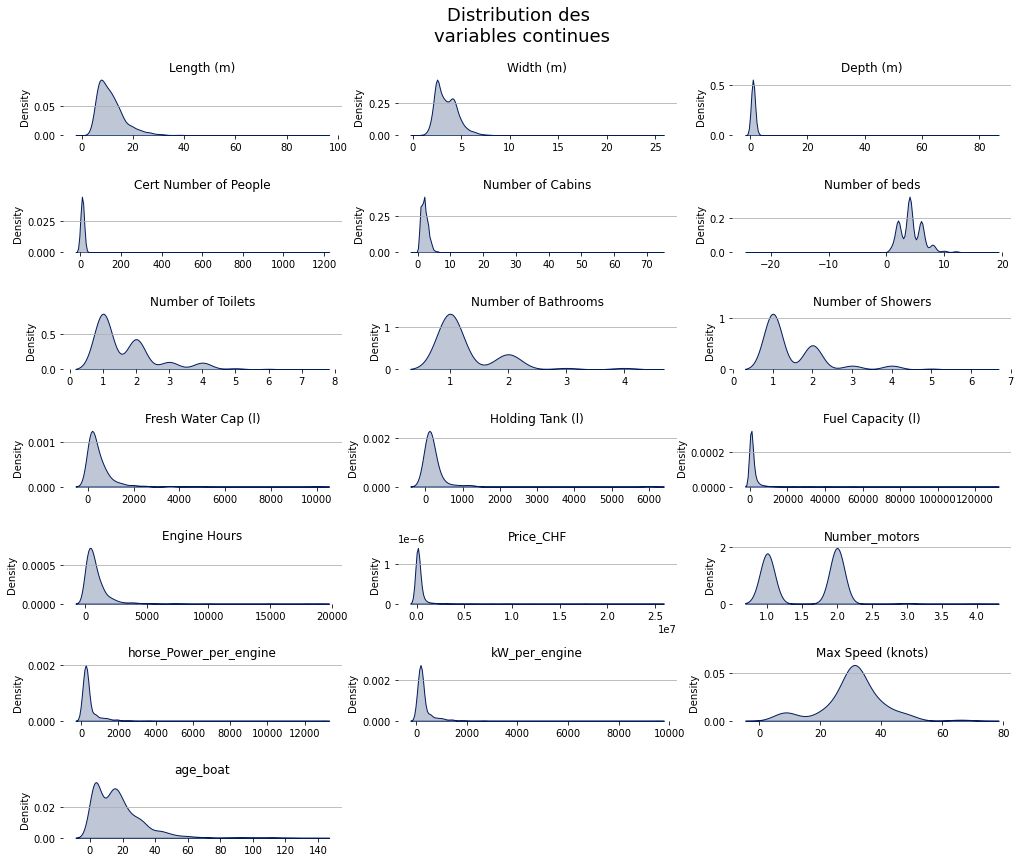

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = ["#011C5D"]
customPalette = sns.set_palette(sns.color_palette(colors))

# On affiche les distributions
temp=pd.melt(train[col_numericals].reset_index(), id_vars='index', value_vars=col_numericals).iloc[:,-2:]
 
ncols = 3
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Distribution des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.kdeplot(ax=ax, data=temp[temp['variable']==variable], legend=None, palette=customPalette, shade=True)
    ax.grid(b=True, which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)
    
del(temp)

In [73]:
train[col_categoricals].describe(include=['O'])

Model              Type                       Location  \
count          3432              3430                           3426   
unique         2887                32                           1487   
top     BARRACUDA 8  Used boat,Diesel  Netherlands » In verkoophaven   
freq             10              1429                            132   

       Equipment         Price     Category    Boat Type  \
count       2097          3433         3433         3433   
unique      1940          1523            1           74   
top      Battery  EUR 95.000,-  Power Boats  Motor Yacht   
freq          17            29         3433          937   

                Manufacturer Boat name  Condition CE Design Category  \
count                   2965       416       1123                249   
unique                   604       407          7                  4   
top     Bénéteau power boats    Maxima  very good        C - Inshore   
freq                     229         5        380                123   

         Hull Color Material          Propulsion       Engine Fuel Type  
count          1136     2855                1100         3151      2666  
unique          185        9                   7         1831         5  
top     white white      GRP  Inboard with Shaft  Volvo Penta    Diesel  
freq            272     1895                 421          128      1593

In [74]:
# On supprime les colonnes que l'on n'exploitera pas (on ajoute Price que nous avons transformer en Price_CHF)
train.drop(columns = ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price'], inplace=True)

# On supprime également les variables de la liste des catégorielle
col_categoricals = [col for col in col_categoricals if col not in ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price']]

print(col_categoricals)

['Type', 'Category', 'Boat Type', 'Manufacturer', 'Condition', 'CE Design Category', 'Material', 'Propulsion', 'Fuel Type']


In [75]:
# On regroupe les modalités de Manufactureur
def group_manufacturer(x):
    # Si le manufactureur est l'un des 4 principaux alors on le consevre
    if x in ['Bénéteau power boats', 'Jeanneau power boats', 'Sunseeker power boats', 'Azimut power boats'] :
        return x
    
    # Sinon on le regroupe 
    else :
        return 'Other'
    
train['Manufacturer'] = train['Manufacturer'].apply(lambda x: group_manufacturer(x) if str(x) != 'nan' else x)


# On regroupe le Type
def group_type(x):
    
    # On catégorise le bateau : neuf, occasion, exposition
    if 'used' in x.lower() :
        return 'USED_BOAT'
    
    elif 'new' in x.lower() :
        return 'NEW_BOAT'
    
    elif 'display' in x.lower() :
        return 'DISPLAY_BOAT'
    
    # Dans tous les autres cas on remplace par des valeur manquante car pour ces annonces c'est le type du fuel qui s'affiche
    else :
        return np.nan
    
train['Type'] = train['Type'].apply(lambda x: group_type(x) if str(x) != 'nan' else x)


# On regroupe les types de bateaux
def group_boat_type(x):
    
    # Pour les bateaux avec plusieurs types on garde que le dernier, pour les autres cela ne conservse que leur type unique
    boat_type = x.split(',')[-1]
    
    return boat_type

train['Boat Type'] = train['Boat Type'].apply(lambda x: group_boat_type(x) if str(x) != 'nan' else x)

# Nous allons juste regrouper les modalités ayant des occurences inferieurs à 20 pour cette variable
nb_values_boat_type = pd.DataFrame(train['Boat Type'].value_counts(dropna=False)).reset_index()

dict_nb_values_boat_type = dict(zip(nb_values_boat_type.iloc[:,0], nb_values_boat_type.iloc[:,1]))

list_values_to_group = [k for k,v in dict_nb_values_boat_type.items() if v > 20]

train['Boat Type'] = train['Boat Type'].apply(lambda x: "Other" if x not in list_values_to_group else x)

In [76]:
# Pour les variables suivantes, nous regroupons les modalités trop peu fréquentes

# On regroupe les modalités de Condition
def group_condition(x):
    # Si le bateau est en très bon état
    if x in ['very good', 'new', 'as new'] :
        return 'new'
    
    # Si le bateau est en bon état
    if x in ['well-groomed', 'good'] :
        return 'good'
    
    # Sinon on le regroupe 
    else :
        return 'Other'
    
# On regroupe les modalités de Material
def material(x):
    
    if x not in ['GRP', 'Missing', 'PVC', 'Steel', 'Wood', 'Aluminium'] :
        return 'Other'
    
    else :
        return x
    
# On regroupe les modalités de Propulsion
def group_propulsion(x):
    
    if 'drive' in x.lower() :
        return 'Drive'
    
    elif 'inboard' in x.lower() :
        return 'Inboad'
    
    elif 'outboard' in x.lower() :
        return 'Outbord'
    
    else :
        return 'Other'
    
# On regroupe le type de carburant
def group_fuel_type(x):
    
    if x not in ['Diesel', 'Unleaded'] :
        return 'Other'
    
    else :
        return x
    
# Application des traitements   
train['Condition'] = train['Condition'].apply(lambda x: group_condition(x) if str(x) != 'nan' else x)

train['Material'] = train['Material'].apply(lambda x : material(x) if str(x) != 'nan' else x)

train['Propulsion'] = train['Propulsion'].apply(lambda x: group_propulsion(x) if str(x) != 'nan' else x)

train['Fuel Type'] = train['Fuel Type'].apply(lambda x: group_fuel_type(x) if str(x) != 'nan' else x)

In [77]:
train[col_categoricals].describe()

Type     Category    Boat Type Manufacturer Condition  \
count        3404         3433         3433         2965      1123   
unique          3            1           18            5         3   
top     USED_BOAT  Power Boats  Motor Yacht        Other       new   
freq         2599         3433          962         2317       835   

       CE Design Category Material Propulsion Fuel Type  
count                 249     2855       1100      2666  
unique                  4        6          3         3  
top           C - Inshore      GRP     Inboad    Diesel  
freq                  123     1895        421      1593

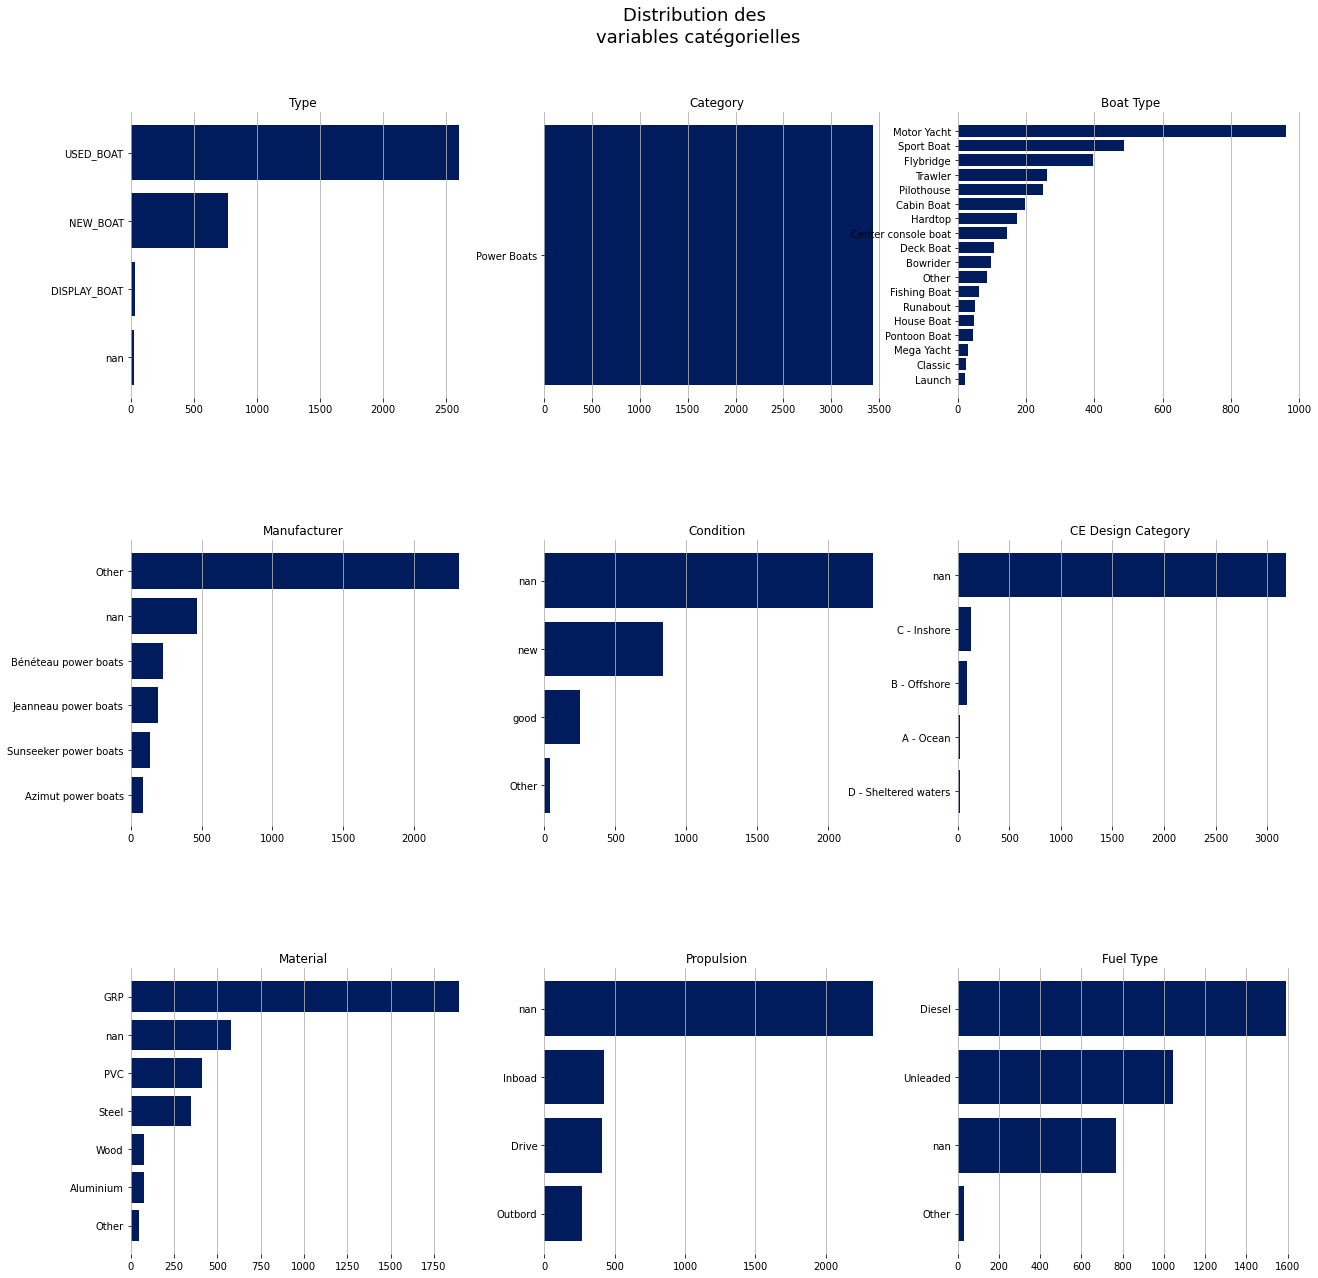

In [78]:
# On peut maintenant regarder la distribution des variables catégorielles
temp=pd.melt(train[col_categoricals].reset_index(), id_vars='index', value_vars=col_categoricals).iloc[:,-2:].astype(str)

ncols = 3
nrows = len(col_categoricals) // ncols + (len(col_categoricals) % ncols > 0)
 
plt.figure(figsize=(21, 21))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution des \nvariables catégorielles", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_categoricals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
    
    temp2=pd.DataFrame(temp[temp['variable']==variable]['value'].value_counts(dropna=False)).reset_index().sort_values(by='value' , ascending=True)
    ax.barh(y= temp2['index'], width= temp2['value'], color='#011C5D')
 
    ax.grid(b=True, which='major', axis='x')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)
    
del(temp, temp2)

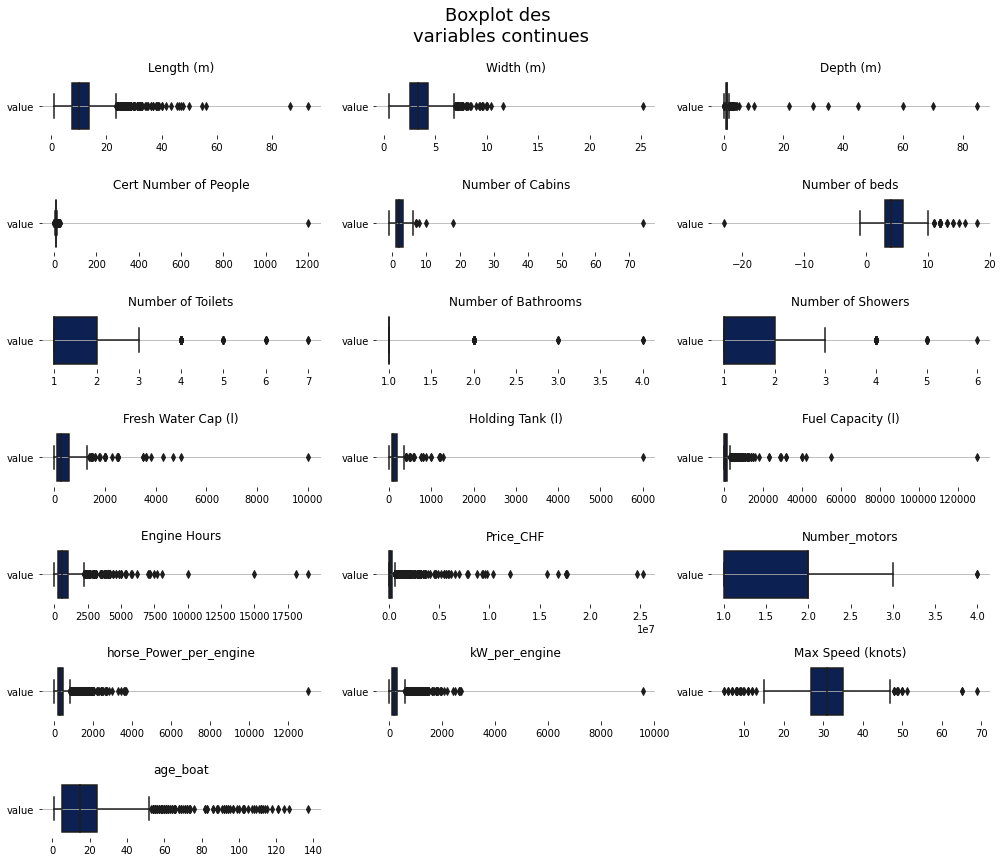

In [79]:
# On affiche les boxplots
temp=pd.melt(train[col_numericals].reset_index(), id_vars='index', value_vars=col_numericals).iloc[:,-2:]
 
ncols = 3
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Boxplot des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.boxplot(ax=ax, data=temp[temp['variable']==variable], palette=customPalette, orient='h')
    #sns.kdeplot(ax=ax, data=temp[temp['variable']==variable], legend=None, palette=customPalette, shade=True)
    ax.grid(b=True, which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)


In [80]:
# Let's consider the observation outside 1.5 * the interquartile range are outliers
# Let's consider those features
# Number of Cabins
# Number of Toilets
# Number of Bathrooms
# Number of Showers
# Engine Hours
# Fresh Water Cap (l)
# Holding Tank (l)
# Fuel Capacity (l)
# Ci-dessous une fonction pour tronquer les outliers

import math

def replace_outlier_IQR(df, column, verbose=True, floor=None, ceil=None) :
    
    # 1er Quartile 
    Q1 = np.nanpercentile(df[column], 25)
    
    # 3ème Quartile 
    Q3 = np.nanpercentile(df[column], 75)
    
    # Inter-Quartile Range (IQR)
    IQR = Q3 - Q1
    
    # limites, basse & haute
    outer_fence = IQR * 1.5
    
    # On ajoute un plancher - Exemple pour le cas des variables qui ne peuvent être inférieure à 0
    if floor != None :
        outer_lower = floor
    else :
        outer_lower = Q1 - outer_fence
        
    # On ajoute un plafond - Exemple pour le cas des variables qui ne peuvent excéder une certaines valeurs
    if ceil != None :
        outer_upper = ceil
    else :
        outer_upper = Q3 + outer_fence
    
    if verbose :
        print(f"Traitement des outliers - {column} :")
        print(f"... les données < {outer_lower} sont tronquées à {math.ceil(outer_lower)}")
        print(f"... les données > {outer_upper} sont tronquées à {math.floor(outer_upper)}\n")
    
    # Remplace les données inférieur et supérieur à la limite
    series = df[column].apply(lambda x: math.ceil(outer_lower) if x < outer_lower else (math.floor(outer_upper) if x > outer_upper else x))
    
    return series

    # remarque pour ces valeurs on force la valeur minimale acceptable à 0 (sens métier)
for col in ["Number of Cabins", "Number of Toilets", "Number of Bathrooms", "Number of Showers", 
            'Engine Hours', 'Fresh Water Cap (l)', 'Holding Tank (l)', 'Fuel Capacity (l)']:
    
    train[col] = replace_outlier_IQR(train, col, floor=0)

Traitement des outliers - Number of Cabins :
... les données < 0 sont tronquées à 0
... les données > 6.0 sont tronquées à 6

Traitement des outliers - Number of Toilets :
... les données < 0 sont tronquées à 0
... les données > 3.5 sont tronquées à 3

Traitement des outliers - Number of Bathrooms :
... les données < 0 sont tronquées à 0
... les données > 1.0 sont tronquées à 1

Traitement des outliers - Number of Showers :
... les données < 0 sont tronquées à 0
... les données > 3.5 sont tronquées à 3

Traitement des outliers - Engine Hours :
... les données < 0 sont tronquées à 0
... les données > 2205.0 sont tronquées à 2205

Traitement des outliers - Fresh Water Cap (l) :
... les données < 0 sont tronquées à 0
... les données > 1350.0 sont tronquées à 1350

Traitement des outliers - Holding Tank (l) :
... les données < 0 sont tronquées à 0
... les données > 395.0 sont tronquées à 395

Traitement des outliers - Fuel Capacity (l) :
... les données < 0 sont tronquées à 0
... les donné

Remarque : La méthode de l'interquartile, n'est pas appropriée à toutes les variables. Par exemple, si nous l'appliquons sur Cert Number of People, elle nous renvoie que tous les bateaux ayant plus de 15 places sont des outliers mais d'un point de vue métier, ce n'est peut être pas une définition qui nous conviendrait

In [81]:
# Ci-dessous une fonction pour tronquer les outliers sur des valeurs précises
def replace_outlier(df, column, verbose=True, floor=None, ceil=None) :
    
    if verbose :
        print(f"Traitement des outliers - {column} :")
        if floor != None :
            print(f"... les données < {floor} sont tronquées à {floor}")
        if ceil != None :
            print(f"... les données > {ceil} sont tronquées à {ceil}\n")
    
    # Remplace les données inférieur et supérieur à la limite
    if floor != None :
        series = df[column].apply(lambda x: floor if x < floor else x)
    if ceil != None :
        series = df[column].apply(lambda x: ceil if x > ceil else x)
    
    return series

train["Cert Number of People"] = replace_outlier(train, "Cert Number of People", ceil=20)

train["Depth (m)"] = replace_outlier(train, "Depth (m)", ceil=10)
train["Length (m)"] = replace_outlier(train, "Length (m)", ceil=60)
train["Width (m)"] = replace_outlier(train, "Width (m)", ceil=15)

train["horse_Power_per_engine"] = replace_outlier(train, "horse_Power_per_engine", ceil=2000)
train["kW_per_engine"] = replace_outlier(train, "kW_per_engine", ceil=2000)

train["Number_motors"] = replace_outlier(train, "Number_motors", ceil=2)

train["Number of beds"] = replace_outlier(train, "Number of beds", floor=0)

Traitement des outliers - Cert Number of People :
... les données > 20 sont tronquées à 20

Traitement des outliers - Depth (m) :
... les données > 10 sont tronquées à 10

Traitement des outliers - Length (m) :
... les données > 60 sont tronquées à 60

Traitement des outliers - Width (m) :
... les données > 15 sont tronquées à 15

Traitement des outliers - horse_Power_per_engine :
... les données > 2000 sont tronquées à 2000

Traitement des outliers - kW_per_engine :
... les données > 2000 sont tronquées à 2000

Traitement des outliers - Number_motors :
... les données > 2 sont tronquées à 2

Traitement des outliers - Number of beds :
... les données < 0 sont tronquées à 0


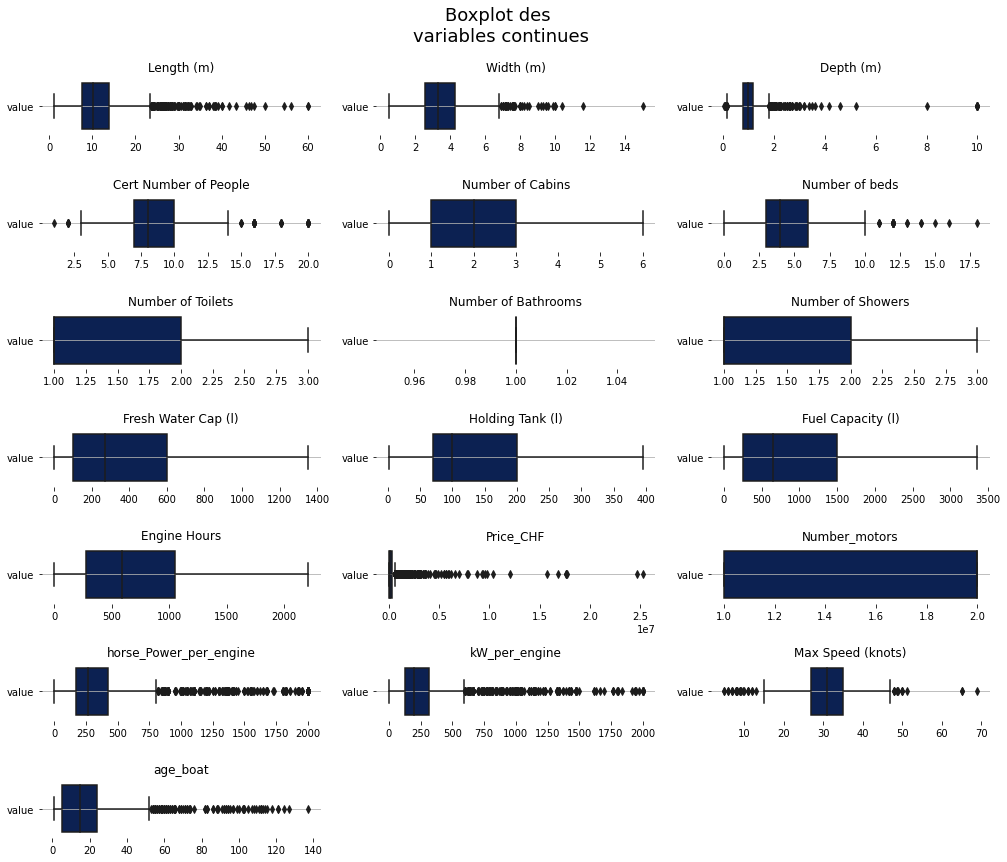

In [82]:
# On affiche les nouvelles distributions
temp=pd.melt(train[col_numericals].reset_index(), id_vars='index', value_vars=col_numericals).iloc[:,-2:]
 
ncols = 3
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Boxplot des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.boxplot(ax=ax, data=temp[temp['variable']==variable], palette=customPalette, orient='h')
    ax.grid(b=True, which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)

In [83]:
def display_percentage_missing_values(df):
  col_categoricals = [col for col in df.columns if df[col].dtypes=='O']
  col_numericals = [col for col in df.columns if col not in col_categoricals]

  dict_cols = {'categoricals': col_categoricals,
               'numericals': col_numericals}

  for k, v in dict_cols.items():

    df_temp = pd.DataFrame(np.round(df[v].isna().sum()*100/len(df),2)).reset_index(drop=False)
    df_temp.columns = ['Feature', 'Pct_Na']
    df_temp.sort_values('Pct_Na', ascending=False, inplace=True)

    print(f"% missing values - Feature {k} :")
    for var in df_temp['Feature'].unique():
      pct_nan = df_temp[df_temp['Feature']==var]['Pct_Na'].values[0]

      if pct_nan != 0:
        print(f"... {var} : {pct_nan} %")

      print()

display_percentage_missing_values(train)

% missing values - Feature categoricals :
... CE Design Category : 92.75 %

... Propulsion : 67.96 %

... Condition : 67.29 %

... Fuel Type : 22.34 %

... Material : 16.84 %

... Manufacturer : 13.63 %

... Type : 0.84 %



% missing values - Feature numericals :
... Number of Bathrooms : 95.75 %

... Holding Tank (l) : 92.25 %

... Max Speed (knots) : 91.29 %

... Number of Showers : 79.76 %

... Fresh Water Cap (l) : 79.14 %

... Number of Toilets : 77.69 %

... Cert Number of People : 65.28 %

... Engine Hours : 49.55 %

... Number of beds : 37.72 %

... Number of Cabins : 36.15 %

... Fuel Capacity (l) : 33.61 %

... Depth (m) : 28.98 %

... Number_motors : 22.58 %

... kW_per_engine : 22.58 %

... horse_Power_per_engine : 22.58 %

... age_boat : 5.16 %

... Width (m) : 0.61 %

... Length (m) : 0.15 %





In [84]:
# Delete all categorical features having more than 80% of NaN
train.dropna(axis=0,                    # axis = 0 sum on all the lines of a column
             thresh=0.8,                 # threshold where we consider to delete the feature (if axis=1, sum would have been done on the lines)
             subset=col_categoricals,     # we are working only on the features from the list
             inplace=True)

In [85]:
# For the categorical features where we have no idea about the reason of the missing, we impute by the category Missing
# On met à jour la liste
col_categoricals = [col for col in train.columns if train[col].dtype=='O']

for col in col_categoricals :
    print(f"Imputation des valeurs manquantes de la colonne '{col}' par 'missing'")
    train[col] = train[col].fillna('missing')       

Imputation des valeurs manquantes de la colonne 'Type' par 'missing'
Imputation des valeurs manquantes de la colonne 'Category' par 'missing'
Imputation des valeurs manquantes de la colonne 'Boat Type' par 'missing'
Imputation des valeurs manquantes de la colonne 'Manufacturer' par 'missing'
Imputation des valeurs manquantes de la colonne 'Condition' par 'missing'
Imputation des valeurs manquantes de la colonne 'CE Design Category' par 'missing'
Imputation des valeurs manquantes de la colonne 'Material' par 'missing'
Imputation des valeurs manquantes de la colonne 'Propulsion' par 'missing'
Imputation des valeurs manquantes de la colonne 'Fuel Type' par 'missing'


In [86]:
train.reset_index(drop=True,inplace=True)

In [87]:
# For the numerical features, we start to impute the missing values fo some categories by the value they should have
# For example if the Number of bedroom is missing, it means that there is no bedroom
col_to_impute_0 = [col for col in col_numericals if "Number" in col]
col_to_impute_0 = col_to_impute_0 + ["Fresh Water Cap (l)", "Holding Tank (l)"]

print(f"Ci-dessous la liste des colonnes à imputer :\n{col_to_impute_0}\n")

for col in col_to_impute_0:
    print(f"Imputation des valeurs manquantes de la colonne '{col}' par 0")
    train[col] = train[col].fillna(0) 


# For some features we can impute them by using a statistical measure (such as the median)
# Here we will go a bit deeper by using the median of each feature to impute by Boat Type
col_to_impute_median = [col for col in col_numericals if '(m)' in col or '(l)' in col]
col_to_impute_median.remove("Holding Tank (l)")
col_to_impute_median.remove("Fresh Water Cap (l)")

col_to_impute_median = col_to_impute_median + ["kW_per_engine", "horse_Power_per_engine"]

print(f"Ci-dessous la liste des colonnes à imputer :\n{col_to_impute_median}\n")

for col in col_to_impute_median:
    print(f"Imputation des valeurs manquantes de la colonne '{col}' par la médiane par Boat Type")
    train[col] = train.groupby('Boat Type')[col].apply(lambda x : x.fillna(round(x.median())))

# We can impute by an impossible value
for col in ['Max Speed (knots)',
           # 'Cruising Speed (knots)', 
            'age_boat'] :
    print(f"Imputation des valeurs manquantes de la colonne '{col}' par -1")
    train[col] = train[col].fillna(-1) 

print("Imputation des valeurs manquantes de la colonne Engine Hours par la médiane par Boat Type")
train["Engine Hours"] = train.groupby('Type')["Engine Hours"].apply(lambda x : x.fillna(round(x.median())))

Ci-dessous la liste des colonnes à imputer :
['Cert Number of People', 'Number of Cabins', 'Number of beds', 'Number of Toilets', 'Number of Bathrooms', 'Number of Showers', 'Number_motors', 'Fresh Water Cap (l)', 'Holding Tank (l)']

Imputation des valeurs manquantes de la colonne 'Cert Number of People' par 0
Imputation des valeurs manquantes de la colonne 'Number of Cabins' par 0
Imputation des valeurs manquantes de la colonne 'Number of beds' par 0
Imputation des valeurs manquantes de la colonne 'Number of Toilets' par 0
Imputation des valeurs manquantes de la colonne 'Number of Bathrooms' par 0
Imputation des valeurs manquantes de la colonne 'Number of Showers' par 0
Imputation des valeurs manquantes de la colonne 'Number_motors' par 0
Imputation des valeurs manquantes de la colonne 'Fresh Water Cap (l)' par 0
Imputation des valeurs manquantes de la colonne 'Holding Tank (l)' par 0
Ci-dessous la liste des colonnes à imputer :
['Length (m)', 'Width (m)', 'Depth (m)', 'Fuel Capacity

In [88]:
train.isna().sum()

Type                      0
Category                  0
Boat Type                 0
Manufacturer              0
Condition                 0
Length (m)                0
Width (m)                 0
Depth (m)                 0
CE Design Category        0
Cert Number of People     0
Number of Cabins          0
Number of beds            0
Number of Toilets         0
Number of Bathrooms       0
Number of Showers         0
Material                  0
Fresh Water Cap (l)       0
Holding Tank (l)          0
Propulsion                0
Fuel Capacity (l)         0
Fuel Type                 0
Engine Hours              0
Advertisement Date        0
Price_CHF                 0
Number_motors             0
horse_Power_per_engine    0
kW_per_engine             0
Max Speed (knots)         0
age_boat                  0
dtype: int64

In [89]:
from sklearn.preprocessing import OneHotEncoder# creating instance of one-hot-encoder
# On affiche pour rappel, la liste des variables catégorielles
col_categoricals = [col for col in train.columns if train[col].dtype=='O']

print(f"Here is the list to encode :\n{col_categoricals}")

# Il faut identifier les variables 
for col in col_categoricals :
    print(f"Feature {col} has {train[col].nunique()} categories")

Here is the list to encode :
['Type', 'Category', 'Boat Type', 'Manufacturer', 'Condition', 'CE Design Category', 'Material', 'Propulsion', 'Fuel Type']
Feature Type has 4 categories
Feature Category has 1 categories
Feature Boat Type has 18 categories
Feature Manufacturer has 6 categories
Feature Condition has 4 categories
Feature CE Design Category has 5 categories
Feature Material has 7 categories
Feature Propulsion has 4 categories
Feature Fuel Type has 4 categories


In [90]:
col_categoricals_price = col_categoricals.copy()
col_categoricals_price.append('Price_CHF')


In [91]:
test = test[test['Price'] != 'Price on request']
data_part = test['Price'].str.partition(' ')
data_part[0] = data_part[0].str.replace('£', 'GBP')
data_part[2] = data_part[2].str.replace('.', '')
data_part[2] = data_part[2].str.replace(',-', '')
data_part[2] = data_part[2].astype(float, errors='raise')

# Price conversion
new_price = data_part.apply(lambda x: dict_change[x[0]] * x[2], axis=1)

new_price = pd.DataFrame(new_price, columns=['Price_CHF'])
test = new_price.merge(test, left_index=True, right_index=True)

validation["Number_motors"] = validation['Engine Performance'].apply(lambda x : find_nb_motors(x) if str(x) != 'nan' else x)
test["Number_motors"] = test['Engine Performance'].apply(lambda x : find_nb_motors(x) if str(x) != 'nan' else x)

validation["horse_Power_per_engine"] = validation['Engine Performance'].apply(lambda x : find_between(x, 'x', 'HP') if str(x) != 'nan' else x)
test["horse_Power_per_engine"] = test['Engine Performance'].apply(lambda x : find_between(x, 'x', 'HP') if str(x) != 'nan' else x)

validation["kW_per_engine"] = validation['Engine Performance'].apply(lambda x : find_between(x, '/', 'kW') if str(x) != 'nan' else x)
test["kW_per_engine"] = test['Engine Performance'].apply(lambda x : find_between(x, '/', 'kW') if str(x) != 'nan' else x)

for col in [#"Cruising Speed", 
            "Max Speed"] :
    
    validation[col+' (knots)'] = validation[col].apply(lambda x : convert_speed_knots(x, dict_knots_conversion) if str(x) != 'nan' else x)

for col in [#"Cruising Speed", 
            "Max Speed"] :
    
    test[col+' (knots)'] = test[col].apply(lambda x : convert_speed_knots(x, dict_knots_conversion) if str(x) != 'nan' else x)

validation.drop(columns=[#"Cruising Speed",
                         "Max Speed", "Engine Performance"], inplace = True)
test.drop(columns=[#"Cruising Speed",
                   "Max Speed", "Engine Performance"], inplace = True)

validation['age_boat'] = current_year - validation['Year Built']

validation.drop(columns = ["Year Built"], inplace =True)

test['age_boat'] = current_year - test['Year Built']

test.drop(columns = ["Year Built"], inplace =True)

col_categoricals_val = [col for col in validation.columns if validation[col].dtype=='O']
col_numericals_val = [col for col in validation.columns if col not in col_categoricals+['Advertisement Date']]
col_categoricals_tt = [col for col in test.columns if test[col].dtype=='O']
col_numericals_tt = [col for col in test.columns if col not in col_categoricals+['Advertisement Date']]

validation.drop(columns = ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price'], inplace=True)
col_categoricals_val = [col for col in col_categoricals_val if col not in ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price']]

test.drop(columns = ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price'], inplace=True)
col_categoricals_tt = [col for col in col_categoricals_tt if col not in ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price']]

validation['Manufacturer'] = validation['Manufacturer'].apply(lambda x: group_manufacturer(x) if str(x) != 'nan' else x)
test['Manufacturer'] = test['Manufacturer'].apply(lambda x: group_manufacturer(x) if str(x) != 'nan' else x)

validation['Type'] = validation['Type'].apply(lambda x: group_type(x) if str(x) != 'nan' else x)
test['Type'] = test['Type'].apply(lambda x: group_type(x) if str(x) != 'nan' else x)

validation['Boat Type'] = validation['Boat Type'].apply(lambda x: group_boat_type(x) if str(x) != 'nan' else x)
test['Boat Type'] = test['Boat Type'].apply(lambda x: group_boat_type(x) if str(x) != 'nan' else x)

validation['Boat Type'] = validation['Boat Type'].apply(lambda x: "Other" if x not in list_values_to_group else x)
test['Boat Type'] = test['Boat Type'].apply(lambda x: "Other" if x not in list_values_to_group else x)

validation['Condition'] = validation['Condition'].apply(lambda x: group_condition(x) if str(x) != 'nan' else x)
validation['Material'] = validation['Material'].apply(lambda x : material(x) if str(x) != 'nan' else x)
validation['Propulsion'] = validation['Propulsion'].apply(lambda x: group_propulsion(x) if str(x) != 'nan' else x)
validation['Fuel Type'] = validation['Fuel Type'].apply(lambda x: group_fuel_type(x) if str(x) != 'nan' else x)

test['Condition'] = test['Condition'].apply(lambda x: group_condition(x) if str(x) != 'nan' else x)
test['Material'] = test['Material'].apply(lambda x : material(x) if str(x) != 'nan' else x)
test['Propulsion'] = test['Propulsion'].apply(lambda x: group_propulsion(x) if str(x) != 'nan' else x)
test['Fuel Type'] = test['Fuel Type'].apply(lambda x: group_fuel_type(x) if str(x) != 'nan' else x)

validation['Number of Cabins'] = np.where(validation['Number of Cabins'] <0, 0, validation['Number of Cabins'])
validation['Number of Cabins'] = np.where(validation['Number of Cabins'] >6, 6, validation['Number of Cabins'])
test['Number of Cabins'] = np.where(test['Number of Cabins'] <0, 0, test['Number of Cabins'])
test['Number of Cabins'] = np.where(test['Number of Cabins'] >6, 6, test['Number of Cabins'])

validation['Number of Toilets'] = np.where(validation['Number of Toilets'] <0, 0, validation['Number of Toilets'])
validation['Number of Toilets'] = np.where(validation['Number of Toilets'] >3.5, 3, validation['Number of Toilets'])
test['Number of Toilets'] = np.where(test['Number of Toilets'] <0, 0, test['Number of Toilets'])
test['Number of Toilets'] = np.where(test['Number of Toilets'] >3.5, 3, test['Number of Toilets'])

validation['Number of Bathrooms'] = np.where(validation['Number of Bathrooms'] <0, 0, validation['Number of Bathrooms'])
validation['Number of Bathrooms'] = np.where(validation['Number of Bathrooms'] >1, 1, validation['Number of Bathrooms'])
test['Number of Bathrooms'] = np.where(test['Number of Bathrooms'] <0, 0, test['Number of Bathrooms'])
test['Number of Bathrooms'] = np.where(test['Number of Bathrooms'] >1, 1, test['Number of Bathrooms'])

validation['Number of Showers'] = np.where(validation['Number of Showers'] <0, 0, validation['Number of Showers'])
validation['Number of Showers'] = np.where(validation['Number of Showers'] >3.5, 3, validation['Number of Showers'])
test['Number of Showers'] = np.where(test['Number of Showers'] <0, 0, test['Number of Showers'])
test['Number of Showers'] = np.where(test['Number of Showers'] >3.5, 3, test['Number of Showers'])

validation['Engine Hours'] = np.where(validation['Engine Hours'] <0, 0, validation['Engine Hours'])
validation['Engine Hours'] = np.where(validation['Engine Hours'] >2205, 2205, validation['Engine Hours'])
test['Engine Hours'] = np.where(test['Engine Hours'] <0, 0, test['Engine Hours'])
test['Engine Hours'] = np.where(test['Engine Hours'] >2205, 2205, test['Engine Hours'])

validation['Fresh Water Cap (l)'] = np.where(validation['Fresh Water Cap (l)'] <0, 0, validation['Fresh Water Cap (l)'])
validation['Fresh Water Cap (l)'] = np.where(validation['Fresh Water Cap (l)'] >1350, 1350, validation['Fresh Water Cap (l)'])
test['Fresh Water Cap (l)'] = np.where(test['Fresh Water Cap (l)'] <0, 0, test['Fresh Water Cap (l)'])
test['Fresh Water Cap (l)'] = np.where(test['Fresh Water Cap (l)'] >1350, 1350, test['Fresh Water Cap (l)'])

validation['Holding Tank (l)'] = np.where(validation['Holding Tank (l)'] <0, 0, validation['Holding Tank (l)'])
validation['Holding Tank (l)'] = np.where(validation['Holding Tank (l)'] >395, 395, validation['Holding Tank (l)'])
test['Holding Tank (l)'] = np.where(test['Holding Tank (l)'] <0, 0, test['Holding Tank (l)'])
test['Holding Tank (l)'] = np.where(test['Holding Tank (l)'] >395, 395, test['Holding Tank (l)'])

validation['Fuel Capacity (l)'] = np.where(validation['Fuel Capacity (l)'] <0, 0, validation['Fuel Capacity (l)'])
validation['Fuel Capacity (l)'] = np.where(validation['Fuel Capacity (l)'] >3360, 3360, validation['Fuel Capacity (l)'])
test['Fuel Capacity (l)'] = np.where(test['Fuel Capacity (l)'] <0, 0, test['Fuel Capacity (l)'])
test['Fuel Capacity (l)'] = np.where(test['Fuel Capacity (l)'] >3360, 3360, test['Fuel Capacity (l)'])

validation["Cert Number of People"] = replace_outlier(validation, "Cert Number of People", ceil=20)

validation["Depth (m)"] = replace_outlier(validation, "Depth (m)", ceil=10)
validation["Length (m)"] = replace_outlier(validation, "Length (m)", ceil=60)
validation["Width (m)"] = replace_outlier(validation, "Width (m)", ceil=15)

validation["horse_Power_per_engine"] = replace_outlier(validation, "horse_Power_per_engine", ceil=2000)
validation["kW_per_engine"] = replace_outlier(validation, "kW_per_engine", ceil=2000)

validation["Number_motors"] = replace_outlier(validation, "Number_motors", ceil=2)

validation["Number of beds"] = replace_outlier(validation, "Number of beds", floor=0)

test["Cert Number of People"] = replace_outlier(test, "Cert Number of People", ceil=20)

test["Depth (m)"] = replace_outlier(test, "Depth (m)", ceil=10)
test["Length (m)"] = replace_outlier(test, "Length (m)", ceil=60)
test["Width (m)"] = replace_outlier(test, "Width (m)", ceil=15)

test["horse_Power_per_engine"] = replace_outlier(test, "horse_Power_per_engine", ceil=2000)
test["kW_per_engine"] = replace_outlier(test, "kW_per_engine", ceil=2000)

test["Number_motors"] = replace_outlier(test, "Number_motors", ceil=2)

test["Number of beds"] = replace_outlier(test, "Number of beds", floor=0)

for col in col_categoricals :
    validation[col] = validation[col].fillna('missing')

for col in col_categoricals :
    test[col] = test[col].fillna('missing')

validation.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

# Here it would have been unbiaised to use the values from the train database
# But I didn't have the time to do it; I will update in the future

for col in col_to_impute_0:
    validation[col] = validation[col].fillna(0) 

for col in col_to_impute_0:
    test[col] = test[col].fillna(0) 

for col in col_to_impute_median:
    validation[col] = validation.groupby('Boat Type')[col].apply(lambda x : x.fillna(round(x.median())))

for col in col_to_impute_median:
    test[col] = test.groupby('Boat Type')[col].apply(lambda x : x.fillna(round(x.median())))

for col in ['Max Speed (knots)', 
            #'Cruising Speed (knots)', 
            'age_boat'] :
    validation[col] = validation[col].fillna(-1)

for col in ['Max Speed (knots)', 
            #'Cruising Speed (knots)', 
            'age_boat'] :
    test[col] = test[col].fillna(-1) 

validation["Engine Hours"] = validation.groupby('Type')["Engine Hours"].apply(lambda x : x.fillna(round(x.median())))
test["Engine Hours"] = test.groupby('Type')["Engine Hours"].apply(lambda x : x.fillna(round(x.median())))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


Traitement des outliers - Cert Number of People :
... les données > 20 sont tronquées à 20

Traitement des outliers - Depth (m) :
... les données > 10 sont tronquées à 10

Traitement des outliers - Length (m) :
... les données > 60 sont tronquées à 60

Traitement des outliers - Width (m) :
... les données > 15 sont tronquées à 15

Traitement des outliers - horse_Power_per_engine :
... les données > 2000 sont tronquées à 2000

Traitement des outliers - kW_per_engine :
... les données > 2000 sont tronquées à 2000

Traitement des outliers - Number_motors :
... les données > 2 sont tronquées à 2

Traitement des outliers - Number of beds :
... les données < 0 sont tronquées à 0
Traitement des outliers - Cert Number of People :
... les données > 20 sont tronquées à 20

Traitement des outliers - Depth (m) :
... les données > 10 sont tronquées à 10

Traitement des outliers - Length (m) :
... les données > 60 sont tronquées à 60

Traitement des outliers - Width (m) :
... les données > 15 sont t

Let's imagine that you have a boat that you want to sell.

You estimate that based on his characteristics, you could sell it for 175.000 CHF so let's estimate the chance to sell it at this price.

In [92]:
# Let's create a copy that we will use for some data visualization
train_viz = train[col_categoricals_price].copy()
val_viz = validation[col_categoricals_price].copy()
test_viz = test[col_categoricals_price].copy()

In [93]:
train_viz['More_175000CHF'] = np.where(train_viz['Price_CHF']>175000, 1, 0)
val_viz['More_175000CHF'] = np.where(val_viz['Price_CHF']>175000, 1, 0)
test_viz['More_175000CHF'] = np.where(test_viz['Price_CHF']>175000, 1, 0)

In [94]:
train_viz.head()

Type     Category    Boat Type Manufacturer Condition  \
0   NEW_BOAT  Power Boats      Hardtop        Other       new   
1  USED_BOAT  Power Boats        Other        Other      good   
2  USED_BOAT  Power Boats  Motor Yacht        Other       new   
3  USED_BOAT  Power Boats  Motor Yacht        Other       new   
4  USED_BOAT  Power Boats     Runabout        Other   missing   

  CE Design Category Material Propulsion Fuel Type  Price_CHF  More_175000CHF  
0            missing      GRP      Drive    Diesel   290010.0               1  
1            missing      GRP      Drive    Diesel    93450.0               0  
2            missing      GRP     Inboad    Diesel   939750.0               1  
3            missing      GRP    missing  Unleaded    32445.0               0  
4            missing      GRP    missing   missing   304500.0               1

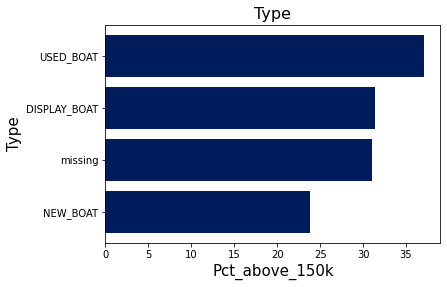

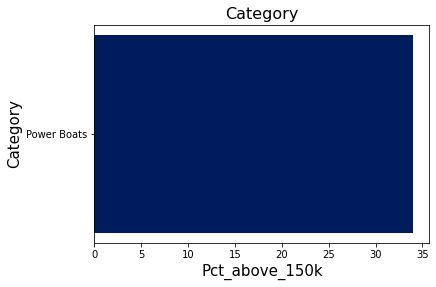

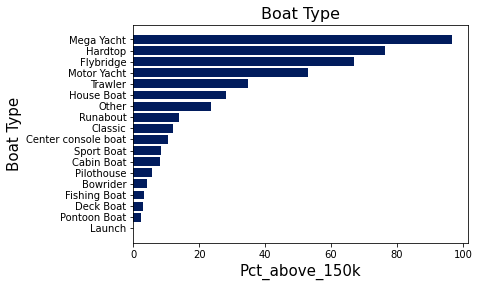

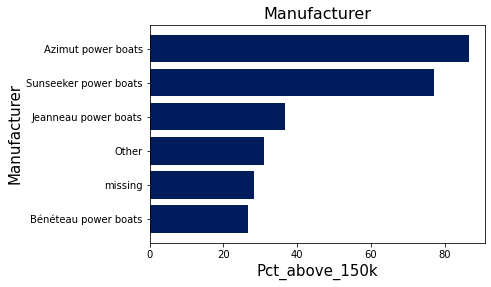

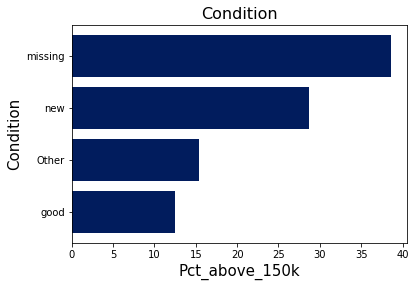

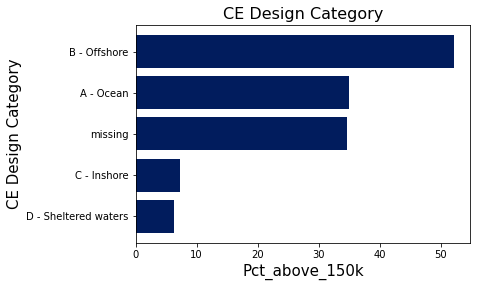

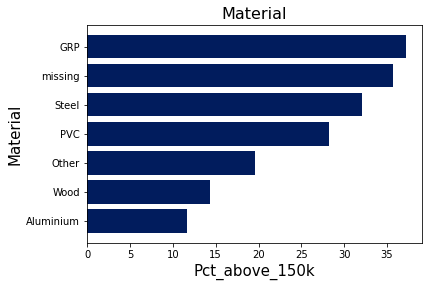

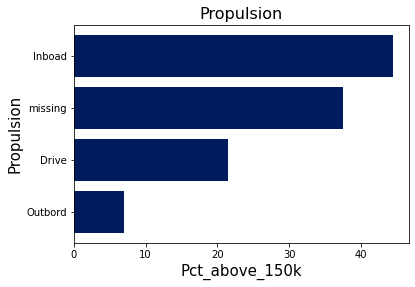

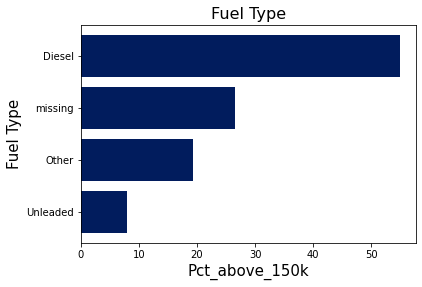

In [95]:
for i in col_categoricals:
  temp = np.round(train_viz.groupby(i)['More_175000CHF'].mean()*100,2)
  temp = pd.Series(temp, name='Pct_above_150k').reset_index().sort_values(by='Pct_above_150k')
  fig1, ax = plt.subplots()
  ax.barh(y=temp[i], width = temp['Pct_above_150k'])
  ax.set_title(i, loc= 'center', fontsize=16) # loc représente la localisation du titre sur le plot
  ax.set_ylabel(i, fontsize=15) # fontsize représente la taille du titre
  ax.set_xlabel('Pct_above_150k', fontsize=15)
  plt.show()

We can group some categories together because they have the same percentage of target -> they have a similar information

In [96]:
# We can delete CE Design Category because not enough values in the categories A-B-C-D and no particular pattern with the target.

# For Material, Other-Wood-Aluminium can be groupped together because they are in the same level of target and they are not highly representated in the database.
def material_grouping(x):
  if x in ['Other', 'Wood', 'Aluminium']:
    return 'Low'
  elif x in ['Steel', 'PVC']:
    return 'Medium'
  else:
    return 'High'

train_viz['Material'] = train_viz['Material'].apply(lambda x: material_grouping(x))

def manufacture_grouping(x):
  if x not in ['Jeanneau power boats', 'Other', 'Missing', 'Bénéteau power boats']:
    return 'Other'
  else :
    return x

train_viz['Manufacturer'] = train_viz['Manufacturer'].apply(lambda x: manufacture_grouping(x))

train_viz['Boat Type'] = np.where(train_viz['Boat Type'] == 'Mega Yacht', 'More_80pct', train_viz['Boat Type'])
train_viz['Boat Type'] = np.where(train_viz['Boat Type'] == 'Hardtop', 'More_80pct' , train_viz['Boat Type'])
train_viz['Boat Type'] = np.where(train_viz['Boat Type'] == 'Flybridge', 'More_50pct', train_viz['Boat Type'])
train_viz['Boat Type'] = np.where(train_viz['Boat Type'] == 'Motor Yacht', 'More_50pct', train_viz['Boat Type'])
train_viz['Boat Type'] = np.where(train_viz['Boat Type'] == 'Trawler', 'More_20pct', train_viz['Boat Type'])
train_viz['Boat Type'] = np.where(train_viz['Boat Type'] == 'House Boat', 'More_20pct', train_viz['Boat Type'])
train_viz['Boat Type'] = np.where(train_viz['Boat Type'] == 'Other', 'More_20pct', train_viz['Boat Type'])

def boattype_grouping(x):
  if x in ['More_80pct', 'More_50pct', 'More_20pct']:
    return x
  else:
    return 'Moins_20pct'

train_viz['Boat Type'] = train_viz['Boat Type'].apply(lambda x: boattype_grouping(x))

train_viz['Type'] = np.where(train_viz['Type']== 'DISPLAY_BOAT', 'display_missing',train_viz['Type'])
train_viz['Type'] = np.where(train_viz['Type']== 'missing', 'display_missing', train_viz['Type'])


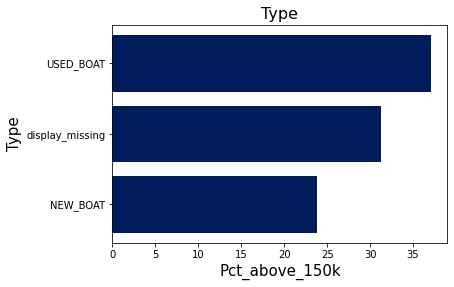

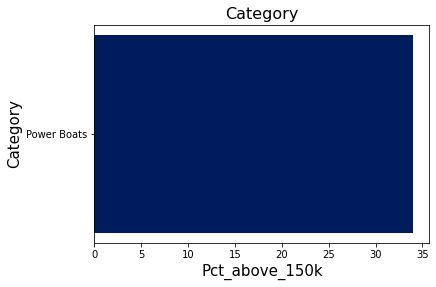

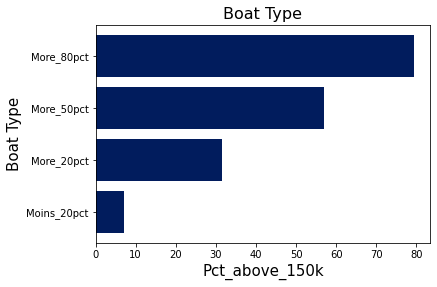

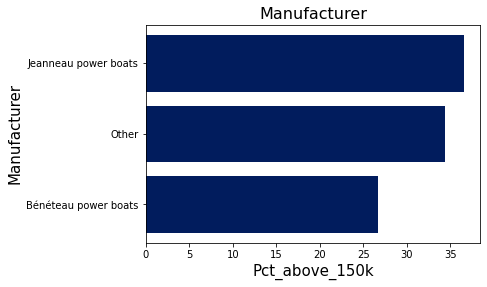

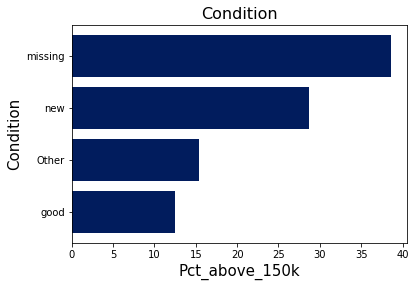

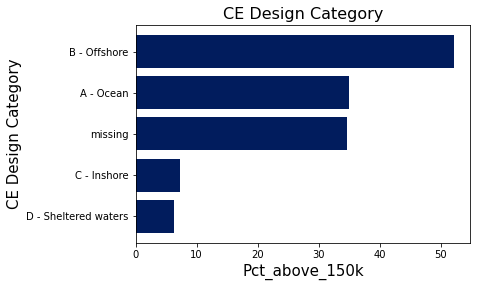

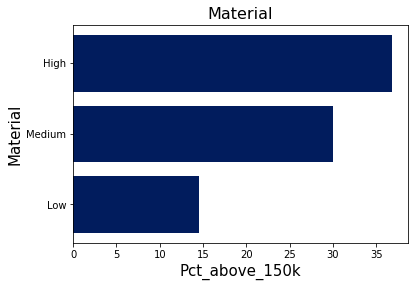

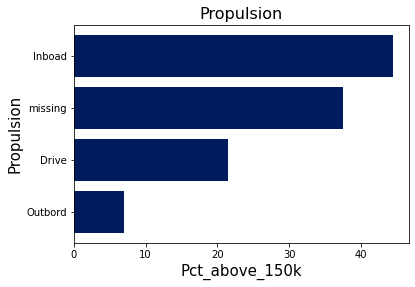

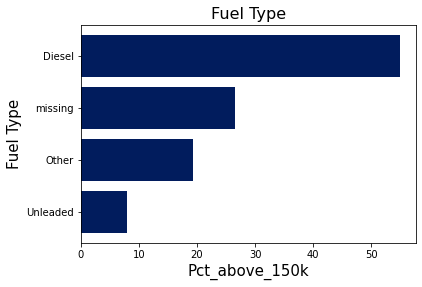

In [97]:
for i in col_categoricals:
  temp = np.round(train_viz.groupby(i)['More_175000CHF'].mean()*100,2)
  temp = pd.Series(temp, name='Pct_above_150k').reset_index().sort_values(by='Pct_above_150k')
  fig1, ax = plt.subplots()
  ax.barh(y=temp[i], width = temp['Pct_above_150k'])
  ax.set_title(i, loc= 'center', fontsize=16) # loc représente la localisation du titre sur le plot
  ax.set_ylabel(i, fontsize=15) # fontsize représente la taille du titre
  ax.set_xlabel('Pct_above_150k', fontsize=15)
  plt.show()

In [98]:
# We can delete CE Design Category because not enough values in the categories A-B-C-D and no particular pattern with the target.

# For Material, Other-Wood-Aluminium can be groupped together because they are in the same level of target and they are not highly representated in the database.
def material_grouping(x):
  if x in ['Other', 'Wood', 'Aluminium']:
    return 'Low'
  elif x in ['Steel', 'PVC']:
    return 'Medium'
  else:
    return 'High'

train['Material'] = train['Material'].apply(lambda x: material_grouping(x))

def manufacture_grouping(x):
  if x not in ['Jeanneau power boats', 'Other', 'Missing', 'Bénéteau power boats']:
    return 'Other'
  else :
    return x

train['Manufacturer'] = train['Manufacturer'].apply(lambda x: manufacture_grouping(x))

train['Boat Type'] = np.where(train['Boat Type'] == 'Mega Yacht', 'More_80pct', train['Boat Type'])
train['Boat Type'] = np.where(train['Boat Type'] == 'Hardtop', 'More_80pct' , train['Boat Type'])
train['Boat Type'] = np.where(train['Boat Type'] == 'Flybridge', 'More_50pct', train['Boat Type'])
train['Boat Type'] = np.where(train['Boat Type'] == 'Motor Yacht', 'More_50pct', train['Boat Type'])
train['Boat Type'] = np.where(train['Boat Type'] == 'Trawler', 'More_20pct', train['Boat Type'])
train['Boat Type'] = np.where(train['Boat Type'] == 'House Boat', 'More_20pct', train['Boat Type'])
train['Boat Type'] = np.where(train['Boat Type'] == 'Other', 'More_20pct', train['Boat Type'])

def boattype_grouping(x):
  if x in ['More_80pct', 'More_50pct', 'More_20pct']:
    return x
  else:
    return 'Moins_20pct'

train['Boat Type'] = train['Boat Type'].apply(lambda x: boattype_grouping(x))

train['Type'] = np.where(train['Type']== 'DISPLAY_BOAT', 'display_missing',train['Type'])
train['Type'] = np.where(train['Type']== 'missing', 'display_missing', train['Type'])


# We can delete CE Design Category because not enough validationues in the categories A-B-C-D and no particular pattern with the target.

# For Material, Other-Wood-Aluminium can be groupped together because they are in the same level of target and they are not highly representated in the database.
def material_grouping(x):
  if x in ['Other', 'Wood', 'Aluminium']:
    return 'Low'
  elif x in ['Steel', 'PVC']:
    return 'Medium'
  else:
    return 'High'

validation['Material'] = validation['Material'].apply(lambda x: material_grouping(x))

def manufacture_grouping(x):
  if x not in ['Jeanneau power boats', 'Other', 'Missing', 'Bénéteau power boats']:
    return 'Other'
  else :
    return x

validation['Manufacturer'] = validation['Manufacturer'].apply(lambda x: manufacture_grouping(x))

validation['Boat Type'] = np.where(validation['Boat Type'] == 'Mega Yacht', 'More_80pct', validation['Boat Type'])
validation['Boat Type'] = np.where(validation['Boat Type'] == 'Hardtop', 'More_80pct' , validation['Boat Type'])
validation['Boat Type'] = np.where(validation['Boat Type'] == 'Flybridge', 'More_50pct', validation['Boat Type'])
validation['Boat Type'] = np.where(validation['Boat Type'] == 'Motor Yacht', 'More_50pct', validation['Boat Type'])
validation['Boat Type'] = np.where(validation['Boat Type'] == 'Trawler', 'More_20pct', validation['Boat Type'])
validation['Boat Type'] = np.where(validation['Boat Type'] == 'House Boat', 'More_20pct', validation['Boat Type'])
validation['Boat Type'] = np.where(validation['Boat Type'] == 'Other', 'More_20pct', validation['Boat Type'])

def boattype_grouping(x):
  if x in ['More_80pct', 'More_50pct', 'More_20pct']:
    return x
  else:
    return 'Moins_20pct'

validation['Boat Type'] = validation['Boat Type'].apply(lambda x: boattype_grouping(x))

validation['Type'] = np.where(validation['Type']== 'DISPLAY_BOAT', 'display_missing',validation['Type'])
validation['Type'] = np.where(validation['Type']== 'missing', 'display_missing', validation['Type'])


# We can delete CE Design Category because not enough testues in the categories A-B-C-D and no particular pattern with the target.

# For Material, Other-Wood-Aluminium can be groupped together because they are in the same level of target and they are not highly representated in the database.
def material_grouping(x):
  if x in ['Other', 'Wood', 'Aluminium']:
    return 'Low'
  elif x in ['Steel', 'PVC']:
    return 'Medium'
  else:
    return 'High'

test['Material'] = test['Material'].apply(lambda x: material_grouping(x))

def manufacture_grouping(x):
  if x not in ['Jeanneau power boats', 'Other', 'Missing', 'Bénéteau power boats']:
    return 'Other'
  else :
    return x

test['Manufacturer'] = test['Manufacturer'].apply(lambda x: manufacture_grouping(x))

test['Boat Type'] = np.where(test['Boat Type'] == 'Mega Yacht', 'More_80pct', test['Boat Type'])
test['Boat Type'] = np.where(test['Boat Type'] == 'Hardtop', 'More_80pct' , test['Boat Type'])
test['Boat Type'] = np.where(test['Boat Type'] == 'Flybridge', 'More_50pct', test['Boat Type'])
test['Boat Type'] = np.where(test['Boat Type'] == 'Motor Yacht', 'More_50pct', test['Boat Type'])
test['Boat Type'] = np.where(test['Boat Type'] == 'Trawler', 'More_20pct', test['Boat Type'])
test['Boat Type'] = np.where(test['Boat Type'] == 'House Boat', 'More_20pct', test['Boat Type'])
test['Boat Type'] = np.where(test['Boat Type'] == 'Other', 'More_20pct', test['Boat Type'])

def boattype_grouping(x):
  if x in ['More_80pct', 'More_50pct', 'More_20pct']:
    return x
  else:
    return 'Moins_20pct'

test['Boat Type'] = test['Boat Type'].apply(lambda x: boattype_grouping(x))

test['Type'] = np.where(test['Type']== 'DISPLAY_BOAT', 'display_missing',test['Type'])
test['Type'] = np.where(test['Type']== 'missing', 'display_missing', test['Type'])

In [99]:
cols_before_encod = train.columns
validation = validation[cols_before_encod]
test = test[cols_before_encod]

In [100]:
train.drop(columns = ['CE Design Category'], inplace=True)
validation.drop(columns=['CE Design Category'], inplace=True)
test.drop(columns=['CE Design Category'], inplace=True)

In [101]:
col_categoricals = [col for col in train.columns if train[col].dtype=='O']

In [102]:
# On identifie les colonnes déjà en numérique, pour regrouper les données ensemble après
col_numericals = [col for col in train.columns if col not in col_categoricals]

enc = OneHotEncoder(handle_unknown='ignore') # On définie le One Hot Encoder, différentes options sont possibles comme retirer une modalité 
                                             # pour chaque variable catégorielle avant d'éviter les problèmes de multicollinéarité 
                                             # (ex : pour régression linéaire)

# On stock les résultats de l'encoding dans une table
enc_df = pd.DataFrame(enc.fit_transform(train[col_categoricals]).toarray()) 

# Que l'on merge ensuite avec nos données catégorielles
train = train[col_numericals].join(enc_df)

# Vous constatez que les variables sont encodées mais qu'il est difficile de savoir quelle est la feature originel
train.head()

Length (m)  Width (m)  Depth (m)  Cert Number of People  Number of Cabins  \
0       10.03       3.23       0.70                    8.0               0.0   
1       13.00       3.00       1.25                    0.0               2.0   
2       28.27       6.60       1.80                    7.0               3.0   
3       10.00       3.50       1.00                    0.0               1.0   
4       15.95       5.00       1.40                    0.0               3.0   

   Number of beds  Number of Toilets  Number of Bathrooms  Number of Showers  \
0             6.0                0.0                  0.0                0.0   
1             4.0                1.0                  0.0                1.0   
2             0.0                3.0                  0.0                3.0   
3             2.0                0.0                  0.0                1.0   
4             6.0                0.0                  0.0                1.0   

   Fresh Water Cap (l)  Holding Tank (l)  Fuel Capacity (l)  Engine Hours  \
0                120.0               0.0              490.0           6.0   
1                 40.0               0.0              900.0         380.0   
2               1350.0             395.0             3360.0        2205.0   
3                200.0              50.0              700.0        1300.0   
4                  0.0               0.0             2000.0        1000.0   

  Advertisement Date  Price_CHF  Number_motors  horse_Power_per_engine  \
0         2020-07-07   290010.0            2.0                   220.0   
1         2020-06-08    93450.0            2.0                   330.0   
2         2020-03-29   939750.0            2.0                  2000.0   
3         2020-02-28    32445.0            2.0                   255.0   
4         2020-08-23   304500.0            2.0                   360.0   

   kW_per_engine  Max Speed (knots)  age_boat    0    1    2    3    4    5  \
0          162.0               -1.0       2.0  1.0  0.0  0.0  1.0  0.0  0.0   
1          243.0               -1.0      32.0  0.0  1.0  0.0  1.0  0.0  1.0   
2         1471.0               27.0      19.0  0.0  1.0  0.0  1.0  0.0  0.0   
3          188.0               -1.0      43.0  0.0  1.0  0.0  1.0  0.0  0.0   
4          265.0               -1.0      19.0  0.0  1.0  0.0  1.0  1.0  0.0   

     6    7    8    9   10   11   12   13   14   15   16   17   18   19   20  \
0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
3  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   

    21   22   23   24   25  
0  0.0  1.0  0.0  0.0  0.0  
1  0.0  1.0  0.0  0.0  0.0  
2  0.0  1.0  0.0  0.0  0.0  
3  1.0  0.0  0.0  1.0  0.0  
4  1.0  0.0  0.0  0.0  1.0

In [103]:
# vous pouvez accéder aux noms de vos nouvelles features avec une méthode dédié de votre encodeur
encname = enc.get_feature_names().tolist()

# x0 = votre première variable donc 'Tpye', et ainsi de suite
print(f"Ci-dessous, la liste des features : \n{encname}")

Ci-dessous, la liste des features : 
['x0_NEW_BOAT', 'x0_USED_BOAT', 'x0_display_missing', 'x1_Power Boats', 'x2_Moins_20pct', 'x2_More_20pct', 'x2_More_50pct', 'x2_More_80pct', 'x3_Bénéteau power boats', 'x3_Jeanneau power boats', 'x3_Other', 'x4_Other', 'x4_good', 'x4_missing', 'x4_new', 'x5_High', 'x5_Low', 'x5_Medium', 'x6_Drive', 'x6_Inboad', 'x6_Outbord', 'x6_missing', 'x7_Diesel', 'x7_Other', 'x7_Unleaded', 'x7_missing']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [104]:
# On affecte les noms stockés par l'encodeur
dict_int_to_encname = {}

for i in range(len(encname)) :
    dict_int_to_encname[i] = encname[i]
    
train.rename(columns=dict_int_to_encname, inplace=True)

train.head()

Length (m)  Width (m)  Depth (m)  Cert Number of People  Number of Cabins  \
0       10.03       3.23       0.70                    8.0               0.0   
1       13.00       3.00       1.25                    0.0               2.0   
2       28.27       6.60       1.80                    7.0               3.0   
3       10.00       3.50       1.00                    0.0               1.0   
4       15.95       5.00       1.40                    0.0               3.0   

   Number of beds  Number of Toilets  Number of Bathrooms  Number of Showers  \
0             6.0                0.0                  0.0                0.0   
1             4.0                1.0                  0.0                1.0   
2             0.0                3.0                  0.0                3.0   
3             2.0                0.0                  0.0                1.0   
4             6.0                0.0                  0.0                1.0   

   Fresh Water Cap (l)  Holding Tank (l)  Fuel Capacity (l)  Engine Hours  \
0                120.0               0.0              490.0           6.0   
1                 40.0               0.0              900.0         380.0   
2               1350.0             395.0             3360.0        2205.0   
3                200.0              50.0              700.0        1300.0   
4                  0.0               0.0             2000.0        1000.0   

  Advertisement Date  Price_CHF  Number_motors  horse_Power_per_engine  \
0         2020-07-07   290010.0            2.0                   220.0   
1         2020-06-08    93450.0            2.0                   330.0   
2         2020-03-29   939750.0            2.0                  2000.0   
3         2020-02-28    32445.0            2.0                   255.0   
4         2020-08-23   304500.0            2.0                   360.0   

   kW_per_engine  Max Speed (knots)  age_boat  x0_NEW_BOAT  x0_USED_BOAT  \
0          162.0               -1.0       2.0          1.0           0.0   
1          243.0               -1.0      32.0          0.0           1.0   
2         1471.0               27.0      19.0          0.0           1.0   
3          188.0               -1.0      43.0          0.0           1.0   
4          265.0               -1.0      19.0          0.0           1.0   

   x0_display_missing  x1_Power Boats  x2_Moins_20pct  x2_More_20pct  \
0                 0.0             1.0             0.0            0.0   
1                 0.0             1.0             0.0            1.0   
2                 0.0             1.0             0.0            0.0   
3                 0.0             1.0             0.0            0.0   
4                 0.0             1.0             1.0            0.0   

   x2_More_50pct  x2_More_80pct  x3_Bénéteau power boats  \
0            0.0            1.0                      0.0   
1            0.0            0.0                      0.0   
2            1.0            0.0                      0.0   
3            1.0            0.0                      0.0   
4            0.0            0.0                      0.0   

   x3_Jeanneau power boats  x3_Other  x4_Other  x4_good  x4_missing  x4_new  \
0                      0.0       1.0       0.0      0.0         0.0     1.0   
1                      0.0       1.0       0.0      1.0         0.0     0.0   
2                      0.0       1.0       0.0      0.0         0.0     1.0   
3                      0.0       1.0       0.0      0.0         0.0     1.0   
4                      0.0       1.0       0.0      0.0         1.0     0.0   

   x5_High  x5_Low  x5_Medium  x6_Drive  x6_Inboad  x6_Outbord  x6_missing  \
0      1.0     0.0        0.0       1.0        0.0         0.0         0.0   
1      1.0     0.0        0.0       1.0        0.0         0.0         0.0   
2      1.0     0.0        0.0       0.0        1.0         0.0         0.0   
3      1.0     0.0        0.0       0.0        0.0         0.0         1.0   
4      1.0     0.

In [105]:
# On remet les noms des variables originelles
dict_encname_to_colname = {}

for i in range(len(col_categoricals)) :
    dict_encname_to_colname['x'+str(i)] = col_categoricals[i]

print(dict_encname_to_colname)

for k,v in dict_encname_to_colname.items():
    
    for col in train.columns[train.columns.str.startswith(k)]:
        train.rename(columns={col : v+col[2:]}, inplace=True)
        
train.head()

{'x0': 'Type', 'x1': 'Category', 'x2': 'Boat Type', 'x3': 'Manufacturer', 'x4': 'Condition', 'x5': 'Material', 'x6': 'Propulsion', 'x7': 'Fuel Type'}


Length (m)  Width (m)  Depth (m)  Cert Number of People  Number of Cabins  \
0       10.03       3.23       0.70                    8.0               0.0   
1       13.00       3.00       1.25                    0.0               2.0   
2       28.27       6.60       1.80                    7.0               3.0   
3       10.00       3.50       1.00                    0.0               1.0   
4       15.95       5.00       1.40                    0.0               3.0   

   Number of beds  Number of Toilets  Number of Bathrooms  Number of Showers  \
0             6.0                0.0                  0.0                0.0   
1             4.0                1.0                  0.0                1.0   
2             0.0                3.0                  0.0                3.0   
3             2.0                0.0                  0.0                1.0   
4             6.0                0.0                  0.0                1.0   

   Fresh Water Cap (l)  Holding Tank (l)  Fuel Capacity (l)  Engine Hours  \
0                120.0               0.0              490.0           6.0   
1                 40.0               0.0              900.0         380.0   
2               1350.0             395.0             3360.0        2205.0   
3                200.0              50.0              700.0        1300.0   
4                  0.0               0.0             2000.0        1000.0   

  Advertisement Date  Price_CHF  Number_motors  horse_Power_per_engine  \
0         2020-07-07   290010.0            2.0                   220.0   
1         2020-06-08    93450.0            2.0                   330.0   
2         2020-03-29   939750.0            2.0                  2000.0   
3         2020-02-28    32445.0            2.0                   255.0   
4         2020-08-23   304500.0            2.0                   360.0   

   kW_per_engine  Max Speed (knots)  age_boat  Type_NEW_BOAT  Type_USED_BOAT  \
0          162.0               -1.0       2.0            1.0             0.0   
1          243.0               -1.0      32.0            0.0             1.0   
2         1471.0               27.0      19.0            0.0             1.0   
3          188.0               -1.0      43.0            0.0             1.0   
4          265.0               -1.0      19.0            0.0             1.0   

   Type_display_missing  Category_Power Boats  Boat Type_Moins_20pct  \
0                   0.0                   1.0                    0.0   
1                   0.0                   1.0                    0.0   
2                   0.0                   1.0                    0.0   
3                   0.0                   1.0                    0.0   
4                   0.0                   1.0                    1.0   

   Boat Type_More_20pct  Boat Type_More_50pct  Boat Type_More_80pct  \
0                   0.0                   0.0                   1.0   
1                   1.0                   0.0                   0.0   
2                   0.0                   1.0                   0.0   
3                   0.0                   1.0                   0.0   
4                   0.0                   0.0                   0.0   

   Manufacturer_Bénéteau power boats  Manufacturer_Jeanneau power boats  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                0.0                                0.0   
3                                0.0                                0.0   
4                                0.0                                0.0   

   Manufacturer_Other  Condition_Other  Condition_good  Condition_missing  \
0                 1.0              0.0             0.0                0.0   
1                 1.0              0.0             1.0                0.0   
2                 1.0              0.0             0.0                0.0   
3                 1.0            

In [106]:
train['total_HP'] = train['Number_motors']*train['horse_Power_per_engine']
train['total_kW'] = train['Number_motors']*train['kW_per_engine']

In [107]:
# On stock les résultats de l'encoding dans une table
enc_df = pd.DataFrame(enc.transform(validation[col_categoricals]).toarray()) 

# Que l'on merge ensuite avec nos données catégorielles
validation = validation[col_numericals].join(enc_df)

encname = enc.get_feature_names().tolist()
dict_int_to_encname = {}

for i in range(len(encname)) :
    dict_int_to_encname[i] = encname[i]
    
validation.rename(columns=dict_int_to_encname, inplace=True)

dict_encname_to_colname = {}

for i in range(len(col_categoricals)) :
    dict_encname_to_colname['x'+str(i)] = col_categoricals[i]

for k,v in dict_encname_to_colname.items():
    
    for col in validation.columns[validation.columns.str.startswith(k)]:
        validation.rename(columns={col : v+col[2:]}, inplace=True)

# On stock les résultats de l'encoding dans une table
enc_df = pd.DataFrame(enc.transform(test[col_categoricals]).toarray()) 

# Que l'on merge ensuite avec nos données catégorielles
test = test[col_numericals].join(enc_df)

encname = enc.get_feature_names().tolist()
dict_int_to_encname = {}

for i in range(len(encname)) :
    dict_int_to_encname[i] = encname[i]
    
test.rename(columns=dict_int_to_encname, inplace=True)

dict_encname_to_colname = {}

for i in range(len(col_categoricals)) :
    dict_encname_to_colname['x'+str(i)] = col_categoricals[i]

for k,v in dict_encname_to_colname.items():
    
    for col in test.columns[test.columns.str.startswith(k)]:
        test.rename(columns={col : v+col[2:]}, inplace=True)

validation['total_HP'] = validation['Number_motors']*validation['horse_Power_per_engine']
validation['total_kW'] = validation['Number_motors']*validation['kW_per_engine']

test['total_HP'] = test['Number_motors']*test['horse_Power_per_engine']
test['total_kW'] = test['Number_motors']*test['kW_per_engine']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [108]:
cols_enc = train.columns
validation = validation[cols_enc]
test = test[cols_enc]

In [109]:
'''train['More_175000CHF'] = np.where(train['Price_CHF']>175000, 1, 0)
validation['More_175000CHF'] = np.where(validation['Price_CHF']>175000, 1, 0)
test['More_175000CHF'] = np.where(test['Price_CHF']>175000, 1, 0)
train.drop(columns = ['Price_CHF'], inplace=True)
validation.drop(columns=['Price_CHF'], inplace=True)
test.drop(columns=['Price_CHF'], inplace=True)'''

"train['More_175000CHF'] = np.where(train['Price_CHF']>175000, 1, 0)\nvalidation['More_175000CHF'] = np.where(validation['Price_CHF']>175000, 1, 0)\ntest['More_175000CHF'] = np.where(test['Price_CHF']>175000, 1, 0)\ntrain.drop(columns = ['Price_CHF'], inplace=True)\nvalidation.drop(columns=['Price_CHF'], inplace=True)\ntest.drop(columns=['Price_CHF'], inplace=True)"

In [110]:
len(test)

5396

In [111]:
'''test = test[test['Price'] != 'Price on request']
data_part = test['Price'].str.partition(' ')
data_part[0] = data_part[0].str.replace('£', 'GBP')
data_part[2] = data_part[2].str.replace('.', '')
data_part[2] = data_part[2].str.replace(',-', '')
data_part[2] = data_part[2].astype(float, errors='raise')

# Price conversion
new_price = data_part.apply(lambda x: dict_change[x[0]] * x[2], axis=1)

new_price = pd.DataFrame(new_price, columns=['Price_CHF'])
test = new_price.merge(test, left_index=True, right_index=True)

validation["Number_motors"] = validation['Engine Performance'].apply(lambda x : find_nb_motors(x) if str(x) != 'nan' else x)
test["Number_motors"] = test['Engine Performance'].apply(lambda x : find_nb_motors(x) if str(x) != 'nan' else x)

validation["horse_Power_per_engine"] = validation['Engine Performance'].apply(lambda x : find_between(x, 'x', 'HP') if str(x) != 'nan' else x)
test["horse_Power_per_engine"] = test['Engine Performance'].apply(lambda x : find_between(x, 'x', 'HP') if str(x) != 'nan' else x)

validation["kW_per_engine"] = validation['Engine Performance'].apply(lambda x : find_between(x, '/', 'kW') if str(x) != 'nan' else x)
test["kW_per_engine"] = test['Engine Performance'].apply(lambda x : find_between(x, '/', 'kW') if str(x) != 'nan' else x)

for col in ["Cruising Speed", "Max Speed"] :
    
    validation[col+' (knots)'] = validation[col].apply(lambda x : convert_speed_knots(x, dict_knots_conversion) if str(x) != 'nan' else x)

for col in ["Cruising Speed", "Max Speed"] :
    
    test[col+' (knots)'] = test[col].apply(lambda x : convert_speed_knots(x, dict_knots_conversion) if str(x) != 'nan' else x)

validation.drop(columns=["Cruising Speed", "Max Speed", "Engine Performance"], inplace = True)
test.drop(columns=["Cruising Speed", "Max Speed", "Engine Performance"], inplace = True)

validation['age_boat'] = current_year - validation['Year Built']

validation.drop(columns = ["Year Built"], inplace =True)

test['age_boat'] = current_year - test['Year Built']

test.drop(columns = ["Year Built"], inplace =True)

col_categoricals_val = [col for col in validation.columns if validation[col].dtype=='O']
col_numericals_val = [col for col in validation.columns if col not in col_categoricals+['Advertisement Date']]
col_categoricals_tt = [col for col in test.columns if test[col].dtype=='O']
col_numericals_tt = [col for col in test.columns if col not in col_categoricals+['Advertisement Date']]

validation.drop(columns = ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price'], inplace=True)
col_categoricals_val = [col for col in col_categoricals_val if col not in ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price']]

test.drop(columns = ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price'], inplace=True)
col_categoricals_tt = [col for col in col_categoricals_tt if col not in ["Model", "Equipment", "Location", "Boat name", "Hull Color", 'Engine', 'Price']]

validation['Manufacturer'] = validation['Manufacturer'].apply(lambda x: group_manufacturer(x) if str(x) != 'nan' else x)
test['Manufacturer'] = test['Manufacturer'].apply(lambda x: group_manufacturer(x) if str(x) != 'nan' else x)

validation['Type'] = validation['Type'].apply(lambda x: group_type(x) if str(x) != 'nan' else x)
test['Type'] = test['Type'].apply(lambda x: group_type(x) if str(x) != 'nan' else x)

validation['Boat Type'] = validation['Boat Type'].apply(lambda x: group_boat_type(x) if str(x) != 'nan' else x)
test['Boat Type'] = test['Boat Type'].apply(lambda x: group_boat_type(x) if str(x) != 'nan' else x)

validation['Boat Type'] = validation['Boat Type'].apply(lambda x: "Other" if x not in list_values_to_group else x)
test['Boat Type'] = test['Boat Type'].apply(lambda x: "Other" if x not in list_values_to_group else x)

validation['Condition'] = validation['Condition'].apply(lambda x: group_condition(x) if str(x) != 'nan' else x)
validation['Material'] = validation['Material'].apply(lambda x : material(x) if str(x) != 'nan' else x)
validation['Propulsion'] = validation['Propulsion'].apply(lambda x: group_propulsion(x) if str(x) != 'nan' else x)
validation['Fuel Type'] = validation['Fuel Type'].apply(lambda x: group_fuel_type(x) if str(x) != 'nan' else x)

test['Condition'] = test['Condition'].apply(lambda x: group_condition(x) if str(x) != 'nan' else x)
test['Material'] = test['Material'].apply(lambda x : material(x) if str(x) != 'nan' else x)
test['Propulsion'] = test['Propulsion'].apply(lambda x: group_propulsion(x) if str(x) != 'nan' else x)
test['Fuel Type'] = test['Fuel Type'].apply(lambda x: group_fuel_type(x) if str(x) != 'nan' else x)

validation['Number of Cabins'] = np.where(validation['Number of Cabins'] <0, 0, validation['Number of Cabins'])
validation['Number of Cabins'] = np.where(validation['Number of Cabins'] >6, 6, validation['Number of Cabins'])
test['Number of Cabins'] = np.where(test['Number of Cabins'] <0, 0, test['Number of Cabins'])
test['Number of Cabins'] = np.where(test['Number of Cabins'] >6, 6, test['Number of Cabins'])

validation['Number of Toilets'] = np.where(validation['Number of Toilets'] <0, 0, validation['Number of Toilets'])
validation['Number of Toilets'] = np.where(validation['Number of Toilets'] >3.5, 3, validation['Number of Toilets'])
test['Number of Toilets'] = np.where(test['Number of Toilets'] <0, 0, test['Number of Toilets'])
test['Number of Toilets'] = np.where(test['Number of Toilets'] >3.5, 3, test['Number of Toilets'])

validation['Number of Bathrooms'] = np.where(validation['Number of Bathrooms'] <0, 0, validation['Number of Bathrooms'])
validation['Number of Bathrooms'] = np.where(validation['Number of Bathrooms'] >1, 1, validation['Number of Bathrooms'])
test['Number of Bathrooms'] = np.where(test['Number of Bathrooms'] <0, 0, test['Number of Bathrooms'])
test['Number of Bathrooms'] = np.where(test['Number of Bathrooms'] >1, 1, test['Number of Bathrooms'])

validation['Number of Showers'] = np.where(validation['Number of Showers'] <0, 0, validation['Number of Showers'])
validation['Number of Showers'] = np.where(validation['Number of Showers'] >3.5, 3, validation['Number of Showers'])
test['Number of Showers'] = np.where(test['Number of Showers'] <0, 0, test['Number of Showers'])
test['Number of Showers'] = np.where(test['Number of Showers'] >3.5, 3, test['Number of Showers'])

validation['Engine Hours'] = np.where(validation['Engine Hours'] <0, 0, validation['Engine Hours'])
validation['Engine Hours'] = np.where(validation['Engine Hours'] >2205, 2205, validation['Engine Hours'])
test['Engine Hours'] = np.where(test['Engine Hours'] <0, 0, test['Engine Hours'])
test['Engine Hours'] = np.where(test['Engine Hours'] >2205, 2205, test['Engine Hours'])

validation['Fresh Water Cap (l)'] = np.where(validation['Fresh Water Cap (l)'] <0, 0, validation['Fresh Water Cap (l)'])
validation['Fresh Water Cap (l)'] = np.where(validation['Fresh Water Cap (l)'] >1350, 1350, validation['Fresh Water Cap (l)'])
test['Fresh Water Cap (l)'] = np.where(test['Fresh Water Cap (l)'] <0, 0, test['Fresh Water Cap (l)'])
test['Fresh Water Cap (l)'] = np.where(test['Fresh Water Cap (l)'] >1350, 1350, test['Fresh Water Cap (l)'])

validation['Holding Tank (l)'] = np.where(validation['Holding Tank (l)'] <0, 0, validation['Holding Tank (l)'])
validation['Holding Tank (l)'] = np.where(validation['Holding Tank (l)'] >395, 395, validation['Holding Tank (l)'])
test['Holding Tank (l)'] = np.where(test['Holding Tank (l)'] <0, 0, test['Holding Tank (l)'])
test['Holding Tank (l)'] = np.where(test['Holding Tank (l)'] >395, 395, test['Holding Tank (l)'])

validation['Fuel Capacity (l)'] = np.where(validation['Fuel Capacity (l)'] <0, 0, validation['Fuel Capacity (l)'])
validation['Fuel Capacity (l)'] = np.where(validation['Fuel Capacity (l)'] >3360, 3360, validation['Fuel Capacity (l)'])
test['Fuel Capacity (l)'] = np.where(test['Fuel Capacity (l)'] <0, 0, test['Fuel Capacity (l)'])
test['Fuel Capacity (l)'] = np.where(test['Fuel Capacity (l)'] >3360, 3360, test['Fuel Capacity (l)'])

validation["Cert Number of People"] = replace_outlier(validation, "Cert Number of People", ceil=20)

validation["Depth (m)"] = replace_outlier(validation, "Depth (m)", ceil=10)
validation["Length (m)"] = replace_outlier(validation, "Length (m)", ceil=60)
validation["Width (m)"] = replace_outlier(validation, "Width (m)", ceil=15)

validation["horse_Power_per_engine"] = replace_outlier(validation, "horse_Power_per_engine", ceil=2000)
validation["kW_per_engine"] = replace_outlier(validation, "kW_per_engine", ceil=2000)

validation["Number_motors"] = replace_outlier(validation, "Number_motors", ceil=2)

validation["Number of beds"] = replace_outlier(validation, "Number of beds", floor=0)

test["Cert Number of People"] = replace_outlier(test, "Cert Number of People", ceil=20)

test["Depth (m)"] = replace_outlier(test, "Depth (m)", ceil=10)
test["Length (m)"] = replace_outlier(test, "Length (m)", ceil=60)
test["Width (m)"] = replace_outlier(test, "Width (m)", ceil=15)

test["horse_Power_per_engine"] = replace_outlier(test, "horse_Power_per_engine", ceil=2000)
test["kW_per_engine"] = replace_outlier(test, "kW_per_engine", ceil=2000)

test["Number_motors"] = replace_outlier(test, "Number_motors", ceil=2)

test["Number of beds"] = replace_outlier(test, "Number of beds", floor=0)

for col in col_categoricals :
    validation[col] = validation[col].fillna('missing')

for col in col_categoricals :
    test[col] = test[col].fillna('missing')

validation.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

# Here it would have been unbiaised to use the values from the train database
# But I didn't have the time to do it; I will update in the future

for col in col_to_impute_0:
    validation[col] = validation[col].fillna(0) 

for col in col_to_impute_0:
    test[col] = test[col].fillna(0) 

for col in col_to_impute_median:
    validation[col] = validation.groupby('Boat Type')[col].apply(lambda x : x.fillna(round(x.median())))

for col in col_to_impute_median:
    test[col] = test.groupby('Boat Type')[col].apply(lambda x : x.fillna(round(x.median())))

for col in ['Max Speed (knots)', 'Cruising Speed (knots)', 'age_boat'] :
    validation[col] = validation[col].fillna(-1)

for col in ['Max Speed (knots)', 'Cruising Speed (knots)', 'age_boat'] :
    test[col] = test[col].fillna(-1) 

validation["Engine Hours"] = validation.groupby('Type')["Engine Hours"].apply(lambda x : x.fillna(round(x.median())))
test["Engine Hours"] = test.groupby('Type')["Engine Hours"].apply(lambda x : x.fillna(round(x.median())))



#############
#############
#############


# On stock les résultats de l'encoding dans une table
enc_df = pd.DataFrame(enc.transform(validation[col_categoricals]).toarray()) 

# Que l'on merge ensuite avec nos données catégorielles
validation = validation[col_numericals].join(enc_df)

encname = enc.get_feature_names().tolist()
dict_int_to_encname = {}

for i in range(len(encname)) :
    dict_int_to_encname[i] = encname[i]
    
validation.rename(columns=dict_int_to_encname, inplace=True)

dict_encname_to_colname = {}

for i in range(len(col_categoricals)) :
    dict_encname_to_colname['x'+str(i)] = col_categoricals[i]

for k,v in dict_encname_to_colname.items():
    
    for col in validation.columns[validation.columns.str.startswith(k)]:
        validation.rename(columns={col : v+col[2:]}, inplace=True)

# On stock les résultats de l'encoding dans une table
enc_df = pd.DataFrame(enc.transform(test[col_categoricals]).toarray()) 

# Que l'on merge ensuite avec nos données catégorielles
test = validation[col_numericals].join(enc_df)

encname = enc.get_feature_names().tolist()
dict_int_to_encname = {}

for i in range(len(encname)) :
    dict_int_to_encname[i] = encname[i]
    
test.rename(columns=dict_int_to_encname, inplace=True)

dict_encname_to_colname = {}

for i in range(len(col_categoricals)) :
    dict_encname_to_colname['x'+str(i)] = col_categoricals[i]

for k,v in dict_encname_to_colname.items():
    
    for col in test.columns[test.columns.str.startswith(k)]:
        test.rename(columns={col : v+col[2:]}, inplace=True)

validation['total_HP'] = validation['Number_motors']*validation['horse_Power_per_engine']
validation['total_kW'] = validation['Number_motors']*validation['kW_per_engine']

test['total_HP'] = test['Number_motors']*test['horse_Power_per_engine']
test['total_kW'] = test['Number_motors']*test['kW_per_engine']'''

'test = test[test[\'Price\'] != \'Price on request\']\ndata_part = test[\'Price\'].str.partition(\' \')\ndata_part[0] = data_part[0].str.replace(\'£\', \'GBP\')\ndata_part[2] = data_part[2].str.replace(\'.\', \'\')\ndata_part[2] = data_part[2].str.replace(\',-\', \'\')\ndata_part[2] = data_part[2].astype(float, errors=\'raise\')\n\n# Price conversion\nnew_price = data_part.apply(lambda x: dict_change[x[0]] * x[2], axis=1)\n\nnew_price = pd.DataFrame(new_price, columns=[\'Price_CHF\'])\ntest = new_price.merge(test, left_index=True, right_index=True)\n\nvalidation["Number_motors"] = validation[\'Engine Performance\'].apply(lambda x : find_nb_motors(x) if str(x) != \'nan\' else x)\ntest["Number_motors"] = test[\'Engine Performance\'].apply(lambda x : find_nb_motors(x) if str(x) != \'nan\' else x)\n\nvalidation["horse_Power_per_engine"] = validation[\'Engine Performance\'].apply(lambda x : find_between(x, \'x\', \'HP\') if str(x) != \'nan\' else x)\ntest["horse_Power_per_engine"] = test[\'

Now, we can move to the ML part !

# Regression

In [112]:
# import necessary libraries

import time
import pandas as pd
import numpy as np
import seaborn as sns # for graphic visualisation
import matplotlib.pyplot as plt # for graphic visualisation

from sklearn.model_selection import train_test_split # for splitin into train, test data set
from sklearn import metrics # compute model performances
from sklearn.metrics import mean_squared_error # compute errors in regression models
from sklearn.ensemble import RandomForestRegressor # for the Regression



Reminder how regression works:

Saving Regression_continuous.PNG to Regression_continuous (2).PNG


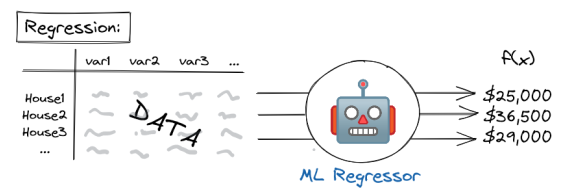

In [113]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

# click on "Choose  Files" and select "Regression_continuous.PNG" file to upload the image 
# ...(you have to previously download this image in the same folder where was the kaggle.json key)
# if it doesn' work you can just skip this cell and run the next cells

Image('Regression_continuous.PNG', width=500)

Features

In [114]:
# Features

X_features = train.columns.to_list() # get the name of the features into a list
# remove some features that won't be used anymore
X_features.remove('Advertisement Date')
X_features.remove('Material_Low')
X_features.remove('Price_CHF')


Y_feature = 'Price_CHF' # that's our target variable which is conitnuous for the regression


In [115]:
# see all the features in the training dataset
print("total number of features: ", len(X_features))
X_features

total number of features:  45


['Length (m)',
 'Width (m)',
 'Depth (m)',
 'Cert Number of People',
 'Number of Cabins',
 'Number of beds',
 'Number of Toilets',
 'Number of Bathrooms',
 'Number of Showers',
 'Fresh Water Cap (l)',
 'Holding Tank (l)',
 'Fuel Capacity (l)',
 'Engine Hours',
 'Number_motors',
 'horse_Power_per_engine',
 'kW_per_engine',
 'Max Speed (knots)',
 'age_boat',
 'Type_NEW_BOAT',
 'Type_USED_BOAT',
 'Type_display_missing',
 'Category_Power Boats',
 'Boat Type_Moins_20pct',
 'Boat Type_More_20pct',
 'Boat Type_More_50pct',
 'Boat Type_More_80pct',
 'Manufacturer_Bénéteau power boats',
 'Manufacturer_Jeanneau power boats',
 'Manufacturer_Other',
 'Condition_Other',
 'Condition_good',
 'Condition_missing',
 'Condition_new',
 'Material_High',
 'Material_Medium',
 'Propulsion_Drive',
 'Propulsion_Inboad',
 'Propulsion_Outbord',
 'Propulsion_missing',
 'Fuel Type_Diesel',
 'Fuel Type_Other',
 'Fuel Type_Unleaded',
 'Fuel Type_missing',
 'total_HP',
 'total_kW']

In [116]:
# copy/rename new train, test, valid sets

# training set
X_train = train[X_features]
Y_train = train[Y_feature]

# test set
X_test = test[X_features]
Y_test = test[Y_feature]

# validation set
X_valid = validation[X_features]
Y_valid = validation[Y_feature]


In [117]:
# see the sahpe of train, test, validation dataset

print('dimension of trainin set: X_train and Y_train: ', X_train.shape, Y_train.shape)
print('dimension of testing set: X_test and Y_test: ', X_test.shape, Y_test.shape)
print('dimension of validation set: X_valid and Y_valid: ', X_valid.shape, Y_valid.shape)

dimension of trainin set: X_train and Y_train:  (3433, 45) (3433,)
dimension of testing set: X_test and Y_test:  (5396, 45) (5396,)
dimension of validation set: X_valid and Y_valid:  (1692, 45) (1692,)


Train the regresion model:

In [118]:
# train the model 

# give the parameters of the model ==> this is a part of optimisation, 
# you can play with the values of the parameters to see if the performances changes

regressor = RandomForestRegressor(n_estimators = 700,  # number of trees you want to build before taking the maximum voting or averages of predictions
                                   bootstrap=  True,
                                   criterion="squared_error", # function to measure the quality of a split
                                    max_depth= 80, # maximum depth of the tree
                                    max_features= 40, # maximum number of features Random Forest is allowed to try in individual tree
                                    min_samples_split=2, # minimum number of samples required to split an internal node
                                    min_samples_leaf= 4, # minimum number of samples required to be at a leaf node
                                    random_state = 42) # makes a solution easy to replicate

 # fit the model on the training set                                  
regressor.fit(X_train, Y_train)


RandomForestRegressor(max_depth=80, max_features=40, min_samples_leaf=4,
                      n_estimators=700, random_state=42)

If you want to read more about the technique to find the optimum parameters for RandomForest Regression:
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [119]:
# get the predictions
pred = regressor.predict(X_test) # will create a list containing the predictions

# check the performances 
# Article explaining the metrics for regression:
# https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/

print('Mean Absolute Error {:0.2f}'.format(metrics.mean_absolute_error(Y_test, pred)) )
print('Mean Squared Error {:0.2f}'.format(metrics.mean_squared_error(Y_test, pred)) ) 
print('Root Mean Squared Error {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, pred))))
print('Test  R^2 Score {:0.2f}'.format(metrics.r2_score(Y_test, pred)) )


Mean Absolute Error 92254.32
Mean Squared Error 188455982792.79
Root Mean Squared Error 434115.17
Test  R^2 Score 0.79


In [120]:
# just to compare some elements of predictions with actual values

print('Predictions: ')
print(pred[:10])
print('Actual Values: ')
print(Y_test[:10])

Predictions: 
[12564.22586496  5724.09787197 17142.98485916  5411.87144532
 23016.74225511 15947.00643712  7747.00434982  9466.56619994
 10618.67527482 10821.97934009]
Actual Values: 
0    3337.00
1    3770.00
2    3850.00
3    3650.00
4    3600.00
5    3472.00
6    3499.65
7    3465.00
8    3500.00
9    3675.00
Name: Price_CHF, dtype: float64


## SHAP 

What is SHAP?

The SHAP stands for SHapley Additive exPlanations and uses the approach of game theory to explain model predictions.

SHAP is a method that explains how individual predictions are made by a machine
learning model. SHAP deconstructs a prediction into a sum of contributions from
each of the model's input variables. For each instance in the data (i.e. row), the
contribution from each input variable (aka "feature") towards the model's prediction
will vary depending on the values of the variables for that particular instance.

1. Load shap library

In [371]:
# install shap package

# comment out to install it (remove # in the beginning of the script)
# in the future runs you an keep it in comment, as you need to install the package only once
# !pip install shap 
import shap
shap.initjs()

2. Create Explainer Object

The explainer generally takes the ML model and data as input and returns an explainer object which has SHAP values 

At first, we'll need to create an explainer object in order to compute SHAP value and plot various charts explaining a particular prediction.

In [415]:
# explainer object
explainer = shap.TreeExplainer(regressor # name of the model
                           ) # dataset on which we want to compute the shap values

3. Generate SHAP values for data examples using the explainer object.

In [416]:
# extract shap values from the explainer ==> can take some time to run (around 10-15 min)
shap_values = explainer(X_test
                        #, check_additivity=False
                        )

The output of SHAP is a dataset with the same dimensions as that on which the model was originally trained (i.e. it has the same input variables as columns and the same instances as rows). Instead of containing the values of the underlying data, however, this dataset contains *SHAP values*. Crucially, the machine learning model's predictions for each instance can be reproduced as the sum of these SHAP values,
plus a  **fixed base value**, such that the model output, *f(x) = base value + sum(SHAP values).*

For regression models, the base value is equal to the mean
of the target variable (e.g. the mean boat price in the dataset)

Saving Regression_continuous_SHAP.PNG to Regression_continuous_SHAP (2).PNG


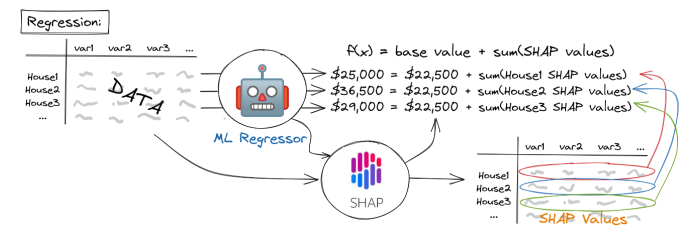

In [374]:
uploaded = files.upload()

# click on "Choose  Files" and select "Regression_continuous_SHAP.PNG" file to upload the image 
# ...(you have to previously download this image in the same folder where was the kaggle.json key)
# if it doesn' work you can just skip this cell and run the next cells

Image('Regression_continuous_SHAP.PNG', width=700)

In [417]:
# the dimensions of input dataset and shap values dataframe are the same:
print('Shap Values df shape', shap_values.shape)
print('X_test df shape', X_test.shape)
pd.DataFrame(shap_values.values, columns= X_test.columns).head()

Shap Values df shape (5396, 45)
X_test df shape (5396, 45)


Length (m)      Width (m)    Depth (m)  Cert Number of People  \
0 -256786.582222 -142276.022778 -4872.887221             177.852934   
1 -249765.301551 -128831.884432 -7632.243438            -312.061292   
2  -98910.263214  -81262.359130 -4118.036449            -655.470792   
3 -252674.893558 -130664.998305 -4657.775139            -522.458954   
4 -117228.795664  -83308.100712 -4475.460762             -74.457426   

   Number of Cabins  Number of beds  Number of Toilets  Number of Bathrooms  \
0       -182.501438    -3599.584299        -116.678599             2.740728   
1       -272.560940    -3720.725532         -76.554680             2.583071   
2        -42.950223    -3894.467522         -52.832756             3.303237   
3       -264.823608    -3743.836439         -80.160256             2.795006   
4         36.993685    -3683.453129         -80.166309             1.747647   

   Number of Showers  Fresh Water Cap (l)  Holding Tank (l)  \
0        -325.545370          -444.429214        -46.823470   
1        -237.274233          -442.725720        -43.533003   
2        -165.342766          -290.102008        -36.487332   
3        -248.532548          -444.457640        -43.558458   
4        -187.761048          -342.295804        -35.449383   

   Fuel Capacity (l)  Engine Hours  Number_motors  horse_Power_per_engine  \
0         288.016478  17311.379363   -1267.708823             1939.710136   
1       -5806.461219  17488.918923   -1058.912159            -6054.998936   
2       -4287.070845  -4290.439618   -1020.077164            -6103.877884   
3       -5743.283678  17672.553945   -1080.983290            -6097.377142   
4       -3617.474131  -5432.142819    -867.001980            -2449.107255   

   kW_per_engine  Max Speed (knots)       age_boat  Type_NEW_BOAT  \
0    2207.849134        -287.135538  102383.254717    3514.074133   
1   -5414.035761        -277.700109  104773.636563    3741.034437   
2   -5260.076481        -244.557977  -74103.738962    -753.059741   
3   -5449.269931        -277.630681  106316.856291    3745.778113   
4   -1788.224777        -253.250742  -48382.363218    -728.926465   

   Type_USED_BOAT  Type_display_missing  Category_Power Boats  \
0     1724.120513             -3.086898                   0.0   
1     1661.053024             -5.862322                   0.0   
2     -486.777554             -1.857091                   0.0   
3     1683.813898             -5.857077                   0.0   
4     -484.327247             -1.956264                   0.0   

   Boat Type_Moins_20pct  Boat Type_More_20pct  Boat Type_More_50pct  \
0              64.755964            459.118909            702.123700   
1             565.651379            494.031689          -1501.415032   
2             179.649036            450.518302           -781.805872   
3             543.938446            493.276893          -1494.302646   
4              56.807382           -978.063854           -766.383731   

   Boat Type_More_80pct  Manufacturer_Bénéteau power boats  \
0          -3604.073238                         116.896635   
1          -3832.726079                         108.350073   
2          -3609.911303                          43.743478   
3          -3833.217440                         123.217445   
4          -3584.602009                          44.975126   

   Manufacturer_Jeanneau power boats  Manufacturer_Other  Condition_Other  \
0                          83.646470          447.872684         0.099278   
1                          53.673531          361.456851         0.102498   
2                          12.115192          115.945190         2.905128   
3                          59.927858          396.826384         0.103021   
4                          13.459435          121.635095         4.131675   

   Condition_good  Condition_missing  Condition_new  Material_High  \
0       10.749437         -42.028973     637.049126     476.802486   
1        8.983764         -13.794471    -215.55

In [418]:
shap_values[0].values

array([-2.56786582e+05, -1.42276023e+05, -4.87288722e+03,  1.77852934e+02,
       -1.82501438e+02, -3.59958430e+03, -1.16678599e+02,  2.74072782e+00,
       -3.25545370e+02, -4.44429214e+02, -4.68234699e+01,  2.88016478e+02,
        1.73113794e+04, -1.26770882e+03,  1.93971014e+03,  2.20784913e+03,
       -2.87135538e+02,  1.02383255e+05,  3.51407413e+03,  1.72412051e+03,
       -3.08689826e+00,  0.00000000e+00,  6.47559639e+01,  4.59118909e+02,
        7.02123700e+02, -3.60407324e+03,  1.16896635e+02,  8.36464701e+01,
        4.47872684e+02,  9.92775858e-02,  1.07494374e+01, -4.20289730e+01,
        6.37049126e+02,  4.76802486e+02,  1.43406673e+02, -6.25662047e+02,
       -1.43816881e+02, -3.88673675e+01, -5.83286688e+02,  8.55181666e+01,
       -7.04332832e+01,  2.56807736e+02,  7.34370483e+02, -1.17792704e+04,
       -1.50473338e+04])

4. Create various visualizations using those shap values explaining prediction. (at local or global level)

### Local interpretability

**Local interpretability: explaining individual predictions**


Explaining predictions for individual instances of the data is referred to as local interpretability. SHAP explains how individual predictions are arrived at in terms of contributions from each of the model's input variables. This is a highly intuitive approach that produces simple but informative outputs.

In [422]:
# index of the instance we want to visualize
sample_idx= 0 # first instance (in python, first element in a list has the index 0...)
# the shap values for the obervation with index 0
shap_values[sample_idx].values

array([-2.56786582e+05, -1.42276023e+05, -4.87288722e+03,  1.77852934e+02,
       -1.82501438e+02, -3.59958430e+03, -1.16678599e+02,  2.74072782e+00,
       -3.25545370e+02, -4.44429214e+02, -4.68234699e+01,  2.88016478e+02,
        1.73113794e+04, -1.26770882e+03,  1.93971014e+03,  2.20784913e+03,
       -2.87135538e+02,  1.02383255e+05,  3.51407413e+03,  1.72412051e+03,
       -3.08689826e+00,  0.00000000e+00,  6.47559639e+01,  4.59118909e+02,
        7.02123700e+02, -3.60407324e+03,  1.16896635e+02,  8.36464701e+01,
        4.47872684e+02,  9.92775858e-02,  1.07494374e+01, -4.20289730e+01,
        6.37049126e+02,  4.76802486e+02,  1.43406673e+02, -6.25662047e+02,
       -1.43816881e+02, -3.88673675e+01, -5.83286688e+02,  8.55181666e+01,
       -7.04332832e+01,  2.56807736e+02,  7.34370483e+02, -1.17792704e+04,
       -1.50473338e+04])

In [423]:
# base value
shap_values[sample_idx].base_values

array([320939.7685629])

In [424]:
print("Actual Value : ", Y_test[sample_idx])
print("Base value : ", np.round(explainer.expected_value, 2)) 
print("SUM of SHAP values for the observation : ", np.round(shap_values[sample_idx].values.sum(),2))

print("\n")
print("Prediction From Model : ", np.round(regressor.predict(X_test)[sample_idx], 2))
print("Prediction From Adding SHAP Values to Base Value : ", "\n",
      # base value
      np.round(explainer.expected_value, 2), "+",
      # sum of shap values for the observation
      np.round(shap_values[sample_idx].values.sum(),2), "=",
      # predicted value
      np.round(explainer.expected_value + shap_values[sample_idx].values.sum(), 2))

Actual Value :  0
Base value :  [320939.77]
SUM of SHAP values for the observation :  -308375.54


Prediction From Model :  12564.23
Prediction From Adding SHAP Values to Base Value :  
 [320939.77] + -308375.54 = [12564.23]


#####  Waterfall plots

Waterfall plots the most complete display of a single prediction.
Below, an example waterfall plot explains the underlying contributions of each feature to the
prediction for the median-priced boat in the dataset. The waterfall structure
emphasises the additive nature of positive and negative contributors, and how they
build on the base value to yield the model's prediction, f(x).

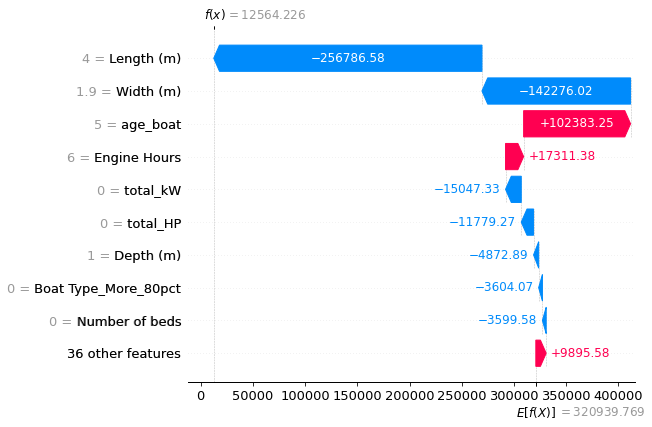

In [425]:
shap.waterfall_plot(shap.Explanation(values=shap_values[sample_idx].values, # shapley values for observation 0
                                     base_values=explainer.expected_value[sample_idx], # base value
                                     data=X_test.iloc[sample_idx],  # features values for obs.0
                                     feature_names=X_test.columns.tolist()))

##### Force Plot

Whereas waterfall plots are expensive and spare no detail when explaining a
prediction, force plots are equivalent representations that display the key information
in a more condensed format

Base value :  [320939.77]
Predicted Value :  12564.23


'Force plots are useful for examining explanations for multiple instances of the data at once,   \nas their compact construction allows for outputs to be stacked vertically for\nease of comparison '

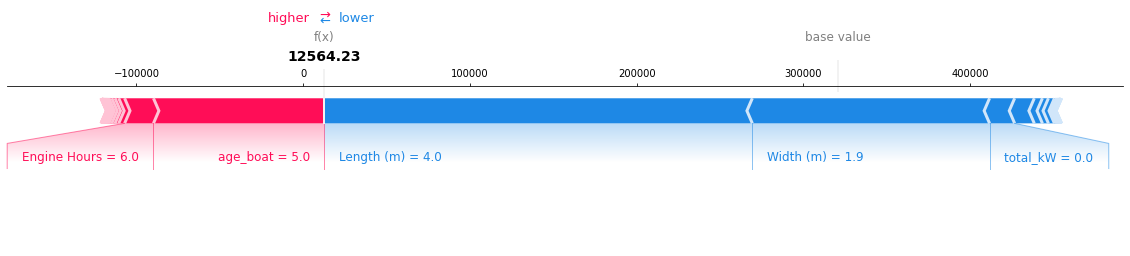

In [426]:
# visualize the first prediction's explanation

print("Base value : ", np.round(explainer.expected_value, 2)) 
print('Predicted Value : ', np.round(regressor.predict(X_test)[sample_idx], 2))

shap.plots.force(shap_values[sample_idx], show=False, matplotlib=True)

'''Force plots are useful for examining explanations for multiple instances of the data at once,   
as their compact construction allows for outputs to be stacked vertically for
ease of comparison '''

*In a force plot, variables with SHAP values that 'push' the model towards a higher price appear o the left in red, 
whereas those that push the model towards a lower price appear onth the rght in blue.*

*The actual value of the variale is show alongside the variable name. Variables with larger SHAO value (more impact) have larger arrows.*

### Global interpretability

**Global interpretability: understanding drivers of predictions**


The goal of global interpretation methods is to describe the expected behaviour of a
machine learning model with respect to the whole distribution of values for its input
variables. With SHAP, this is achieved by aggregating the SHAP values for individual
instances across the entire population.

##### Bar Plots

The simplest starting point for global interpretation with SHAP is to examine the
mean absolute SHAP value for each feature across all of the data. This quantities, on
average, the magnitude (positive or negative) of each feature's contribution towards
the predicted house prices. Features with higher mean absolute SHAP values are
more influential. Mean absolute SHAP values are essentially a drop-in replacement
for more traditional feature importance measures but have two key advantages:



1.   Mean absolute SHAP values are more theoretically rigorous, 
and relate to which
features impact predictions most (which is usually what we're interested in).
Conventional feature importances are measured in more abstract and
algorithm-speci c ways, and are determined by how much each feature
improves the model's predictive performance.
2.   Mean absolute SHAP values have intuitive units - for this example, they are quantified in dollars, like the target variable. Feature importances are often expressed in counterintuitive units based on complex concepts such as tree algorithm node impurities.





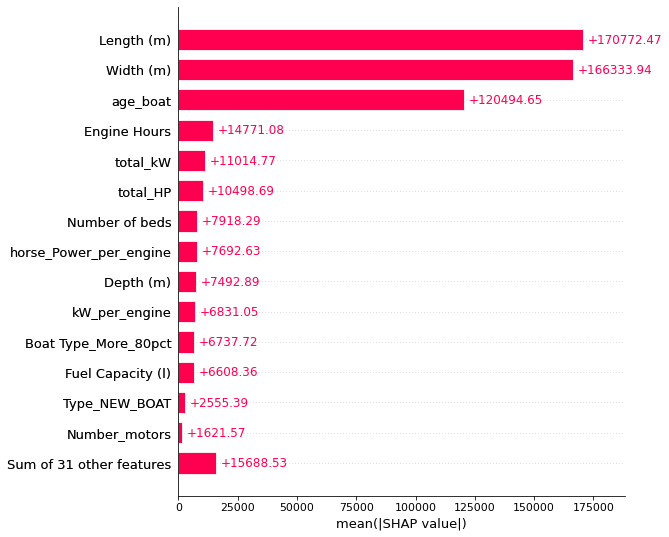

In [427]:
'''Mean absolute SHAP values are typically displayed as bar plots that rank features
by their importance. 
The key characteristics to examine are the ordering of features and the relative magnitudes 
of the mean absolute SHAP values.
Here we see that <<Length>> is the most influential variable, contributing on
average ±CHF 170772.47 to each predicted boat price. By contrast, the least informative
variable, <<Number motors>>, contributes only ± CHF 1621.57 '''

shap.plots.bar(shap_values, 
               max_display=15, 
               show=False)

##### Beeswarm plots

SHAP feature importance bar plots are a superior approach to traditional alternatives but in isolation, they provide little additional value beyond their more rigorous theoretical underpinnings. Beeswarm plots are a more complex and information-rich display of SHAP values that reveal not just the relative importance of features, but their actual relationships with the predicted outcome.

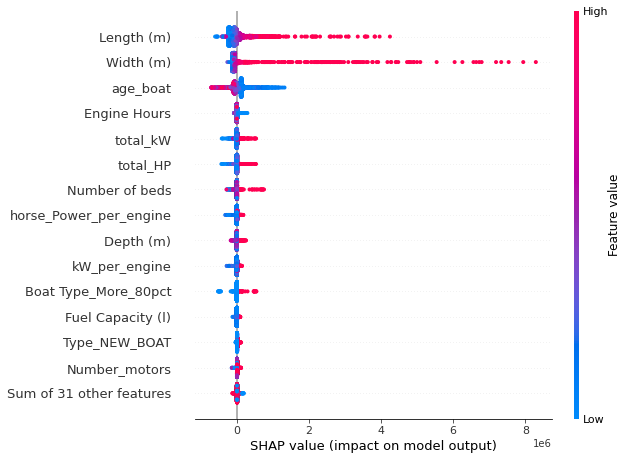

In [428]:
shap.plots.beeswarm(shap_values,
                    max_display=15,
                    show=False)

In beeswarm plot for each variable, every instance of the dataset appeara as it's own point. THe points are distributed horizantally along x-axis according to their SHAP value. In places where ir's a high density, hte points are stacked vertically.
Examining how the SHAP values are distributed reveals how a variable can may influence the model's prediction.

THe color bar corresponds to the raw values of the acutal data for each instance (i.e point) in the graph. If the value o the variable for a particular instance is relatvely high, it appears as a red point, otherwise blue.
Examining the color distribution horizontally along the x axis for each variable provides insights into the genral relationship between a variable's raw value and its SHAP value.




# Random Forest


Saving Regression_clasification_SHAP.PNG to Regression_clasification_SHAP (1).PNG


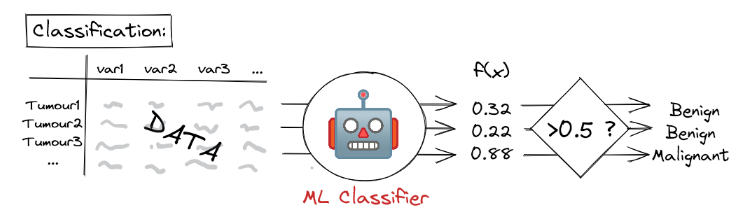

In [384]:
uploaded = files.upload()
# click on "Choose  Files" and select "Regression_classification_SHAP.PNG" file to upload the image 
# ...(you have to previously download this image in the same folder where was the kaggle.json key)
# if it doesn' work you can just skip this cell and run the next cells
Image('Regression_clasification_SHAP.PNG', width=700)

Add the target variable for classification

In [385]:
# in regression our target was the price
train[['Price_CHF']].head()

Price_CHF
0   290010.0
1    93450.0
2   939750.0
3    32445.0
4   304500.0

In [386]:
# in classification problems we want to classify boats that have the price over or below 175k

# add columns "More_175000CHF" in train, test and validation datasets that will be our target variable
# where 1 will be for the boats having the price over 175k
# and 0 for the boats having the price below 175k
train['More_175000CHF'] = np.where(train['Price_CHF']>175000, 1, 0)
validation['More_175000CHF'] = np.where(validation['Price_CHF']>175000, 1, 0)
test['More_175000CHF'] = np.where(test['Price_CHF']>175000, 1, 0)

train['More_175000CHF'].head() # compare Price columns and More_175000CHF colupmns

0    1
1    0
2    1
3    0
4    1
Name: More_175000CHF, dtype: int64

In [387]:
# features

X_features = train.columns.to_list()
X_features.remove('Advertisement Date')
X_features.remove('Material_Low')
X_features.remove('Price_CHF') # now we won't need the Price column any more
X_features.remove('More_175000CHF')

Y_feature = 'More_175000CHF' # our target variable

In [388]:
# create new train, test, validation sets

X_train = train[X_features]
X_test = test[X_features]
Y_train = train[Y_feature]
Y_test = test[Y_feature]

X_valid = validation[X_features]
Y_valid = validation[Y_feature]

Random Forest Classifier

In [389]:
from sklearn.ensemble import RandomForestClassifier # import package for Random forest classifier

# Create the Classifier defining the parameters (you can play with their values to see if the performances are changing)
clf=RandomForestClassifier(n_estimators=500,# number of trees you want to build before taking the maximum voting or averages of predictions
                           bootstrap=True,
                           max_features='auto',
                           n_jobs=1, #  how many processors is it allowed to use. 
                           #A value of “-1” means there is no restriction whereas a value of “1” means it can only use one processor. 
                           min_samples_leaf=1, # Leaf is the end node of a decision tree. 
                           #A smaller leaf makes the model more prone to capturing noise in train data.
                           
                           verbose=0, # print notfications
                           random_state=None) # makes a solution easy to replicate

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=500, n_jobs=1)

In [390]:
# get predictions

pred = clf.predict(X_test)

from sklearn.metrics import classification_report # package for metric
print(classification_report(Y_test, pred)) # check the performances

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3563
           1       0.91      0.91      0.91      1833

    accuracy                           0.94      5396
   macro avg       0.93      0.93      0.93      5396
weighted avg       0.94      0.94      0.94      5396



In [391]:
# compare pred and actual values

print(Y_test[:10])
print(pred[:10])

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: More_175000CHF, dtype: int64
[0 0 0 0 0 0 0 0 0 0]


In [392]:
# do the same on validation set
pred = clf.predict(X_test)
print(classification_report(Y_test, pred))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3563
           1       0.91      0.91      0.91      1833

    accuracy                           0.94      5396
   macro avg       0.93      0.93      0.93      5396
weighted avg       0.94      0.94      0.94      5396



In the classification report above:
Support:
  In total we have 5396 observations (the sum of all values from the confusion matrix)
  3563 of them where actual 0 (and 95% (=3399) were correctly classified, and 166 where wrongly classifief as 1)
  1833 of them where actual 1 (and 91% (=1669) were correctly classified, and 161 where wrongly classifief as 0)

  Reminder:
  

*   Precision: TP / (TP + FP)
*   Recall (Sensitivity) : TP / (TP + FP)
*   Accuracy : Total Correct/ Total Guess
*   F1-score: (2 * Precision * Recall) / (Precision + Recall)
 
  
  Read more about these metrics:
  https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd

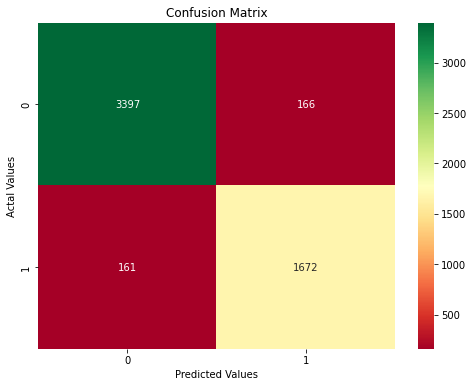

In [393]:
pred = clf.predict(X_test)

# Confusion Matrix

# Creating  a confusion matrix,which compares the y_test and y_pred
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred)

#Plotting the confusion matrix
# seaborn ==> sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdYlGn") # fmt ==> numeric annotation
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Shap Values 

For classification models, the base value is equal to the prevalence of the positive class (e.g. the percentage of tumours in the dataset that are malignant).

## Shap Values Global Interpretation

The goal of global interpretation methods is to describe the expected behaviour of a machine learning model with respect to the whole distribution of values for its input variables. With SHAP, this is achieved by aggregating the SHAP values for individual instances across the entire population.


In [394]:
# import shap 

# Create Tree Explainer object that calculates shap values
explainer = shap.TreeExplainer(clf)

In [395]:
# Calculate Shap values (can take some time to run, around 10 min)
shap_values = explainer.shap_values(X_test)

In [396]:
# select some random observation that have a price over 175k ==> 1
over_idx = list(Y_test[Y_test == 1].index) # indices of all observation that are 1
# importing random module
import random
  
# printing n elements from list
print(random.sample(over_idx, 5)) # randomly select 5 elements

[2086, 2442, 1947, 2304, 1546]


In [397]:
# select some random observation that have a price below 175k ==> 0

under_idx = list(Y_test[Y_test == 0].index) # indices of all observations that are 0
  
# printing n elements from list
print(random.sample(under_idx, 5)) # randomly select 5 elements

[3870, 169, 156, 482, 3921]


##### Summary plot

Mean absolute SHAP values are typically displayed as bar plots that rank features
by their importance. 
The key characteristics to examine are the ordering of features and the relative magnitudes 
of the mean absolute SHAP values.

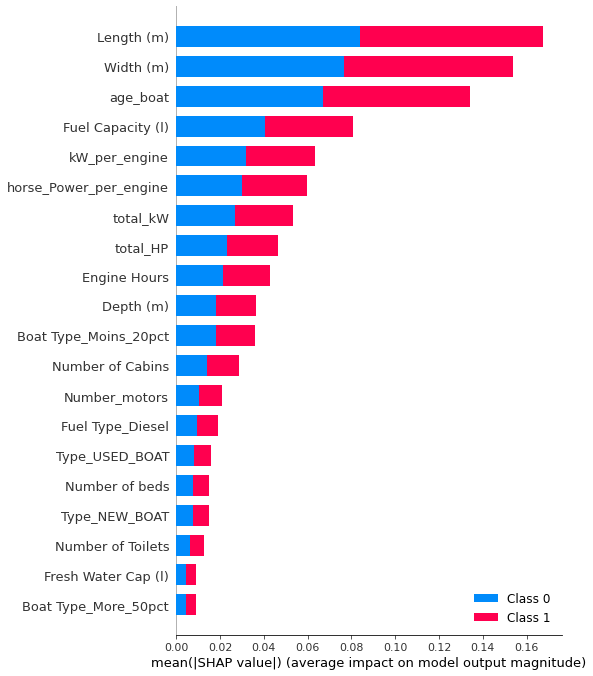

In [398]:
# shap values for all observation (0 and 1)

shap.summary_plot(shap_values, X_test)

In [399]:
# here the output of shap values is an array in 3D of shape (0, 5396,45), where 2 are the number of classes

arr = np.array(shap_values)

print(arr.shape)

(2, 5396, 45)


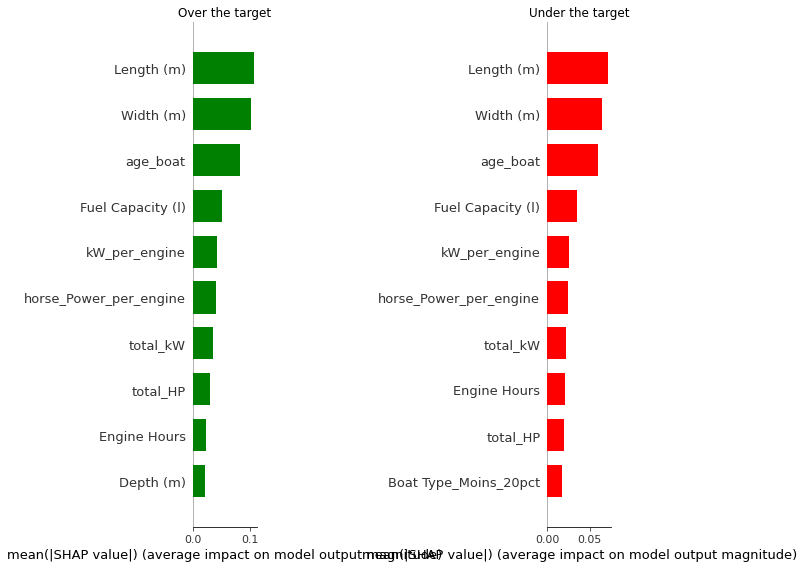

In [400]:
# compare over and under  17500

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
shap.summary_plot(np.array(shap_values)[0, over_idx, :], # class 0 = over
                  X_test[X_test.index.isin(over_idx)].values,
                  max_display=10,
                  color = 'green',
                  feature_names = X_test.columns, plot_type="bar",     
                  show=False, plot_size=None)
plt.title("Over the target")
plt.subplot(1,2,2)
shap.summary_plot(np.array(shap_values)[1, under_idx, :], # class 1 = below 
                  X_test[X_test.index.isin(under_idx)].values,
                  max_display=10,
                  color = 'red',
                  feature_names = X_test.columns, plot_type="bar",     
                  show=False, plot_size=None)
plt.title("Under the target")
plt.show()

#### Beeswarm plots

SHAP feature importance bar plots are a superior approach to traditional alternatives but in isolation, they provide little additional value beyond their more rigorous theoretical underpinnings. Beeswarm plots are a more complex and information-rich display of SHAP values that reveal not just the relative importance of features, but their actual relationships with the predicted outcome.

*beeswarm plot expects two dimensional .values and .base_values but, .tree_explainer RandomForest Classifier API returns 3 dimensional .values and .base_values (1 for each class). Keeping this in mind...*

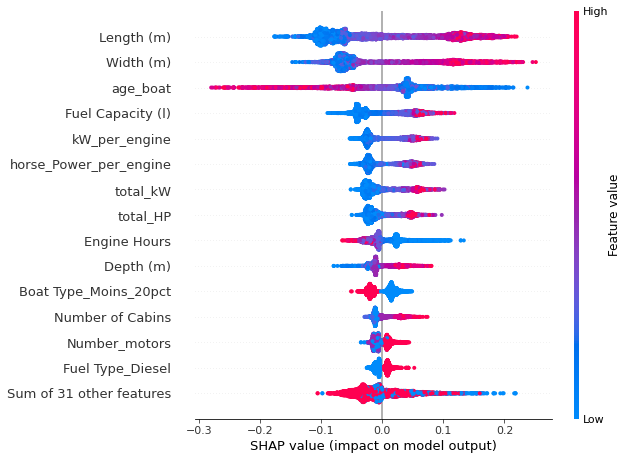

In [401]:
import copy
# can take some time to run
shap_values1 = explainer(X_test)
shap_values2 = copy.deepcopy(shap_values1)
shap_values2.values = shap_values2.values[:,:,1]
shap_values2.base_values = shap_values2.base_values[:,1]

shap.plots.beeswarm(shap_values2,
                    max_display=15,
                    show=False)

In beeswarm plot for each variable, every instance of the dataset appeara as it's own point. The points are distributed horizantally along x-axis according to their SHAP value. In places where it's a high density, hte points are stacked vertically. Examining how the SHAP values are distributed reveals how a variable can may influence the model's prediction.

The color bar corresponds to the raw values of the acutal data for each instance (i.e point) in the graph. If the value o the variable for a particular instance is relatvely high, it appears as a red point, otherwise blue. Examining the color distribution horizontally along the x axis for each variable provides insights into the genral relationship between a variable's raw value and its SHAP value.

## Local Interpretation

#### Waterfall

 visualize an observation from class 0
obervatiàn nb:  1068


Text(0.5, 1.0, ' Features contributing to below 175k')

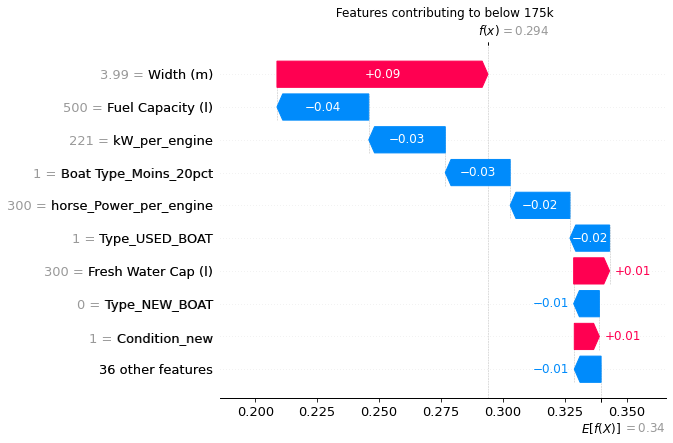

In [402]:
from shap import Explainer, Explanation

print(" visualize an observation from class 0")
choosen_instance = random.sample(under_idx, 1) # select randomly an observation from those that are below
print('obervatiàn nb: ', choosen_instance[0])
exp = Explanation(shap_values2, X_test, feature_names=X_test.columns)
idx = choosen_instance # datapoint to explain
shap.waterfall_plot(exp[choosen_instance[0]], 
                    max_display=10, 
                    show=False)
plt.title(" Features contributing to below 175k")

 visualize an observation from class 1
obervation nb:  2197


Text(0.5, 1.0, ' Features contributing to over 175k')

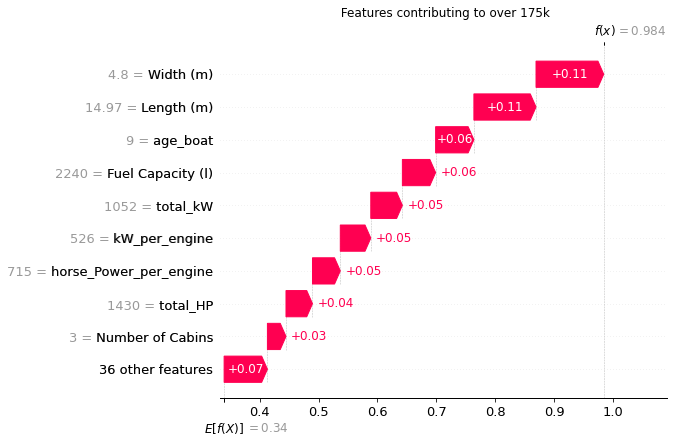

In [403]:
print(" visualize an observation from class 1")
choosen_instance = random.sample(over_idx, 1) # select randomly an observation from those that are over
print('obervation nb: ', choosen_instance[0])
exp = Explanation(shap_values2, X_test, feature_names=X_test.columns)
idx = choosen_instance # datapoint to explain
shap.waterfall_plot(exp[choosen_instance[0]], 
                    max_display=10, 
                    show=False)
plt.title(" Features contributing to over 175k")

#### Force Plot

Whereas waterfall plots are expansive and spare no detail when explaining a
prediction, force plots are equivalent representations that display the key information
in a more condensed format

In [404]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.
print(Y_test.loc[[421]])
X_test.loc[421]

421    0
Name: More_175000CHF, dtype: int64


Length (m)                             7.23
Width (m)                              2.55
Depth (m)                              0.55
Cert Number of People                  8.00
Number of Cabins                       1.00
Number of beds                         0.00
Number of Toilets                      0.00
Number of Bathrooms                    0.00
Number of Showers                      0.00
Fresh Water Cap (l)                   80.00
Holding Tank (l)                       0.00
Fuel Capacity (l)                    280.00
Engine Hours                           6.00
Number_motors                          1.00
horse_Power_per_engine               200.00
kW_per_engine                        147.00
Max Speed (knots)                     -1.00
age_boat                               2.00
Type_NEW_BOAT                          1.00
Type_USED_BOAT                         0.00
Type_display_missing                   0.00
Category_Power Boats                   1.00
Boat Type_Moins_20pct           

In [405]:
# Calculate Shap values
choosen_instance = X_test.loc[[421]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [406]:
# check over observations
# printing n elements from list that are over
idx = random.sample(over_idx, 5)

print(idx)
print(idx[0])

[1634, 2585, 1525, 2519, 1433]
1634


In [407]:
# Calculate Shap values for an obs over
choosen_instance = X_test.loc[idx[0]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [408]:
# Calculate Shap values
choosen_instance = X_test.loc[idx[1]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [409]:
# printing n elements from list that are under

idx = random.sample(under_idx, 5)

print(idx)
print(idx[0])

[674, 3277, 1147, 423, 5146]
674


In [410]:
# Calculate Shap values
choosen_instance = X_test.loc[idx[0]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [411]:
# Calculate Shap values
choosen_instance = X_test.loc[idx[1]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)